## Projeto de Disciplina - Algoritmos de Inteligência Artificial para clusterização [25E4_2]
### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-algoritmos-clusterizacao

### Parte 1

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

- Captura de tela do ambiente rodando na minha máquina:

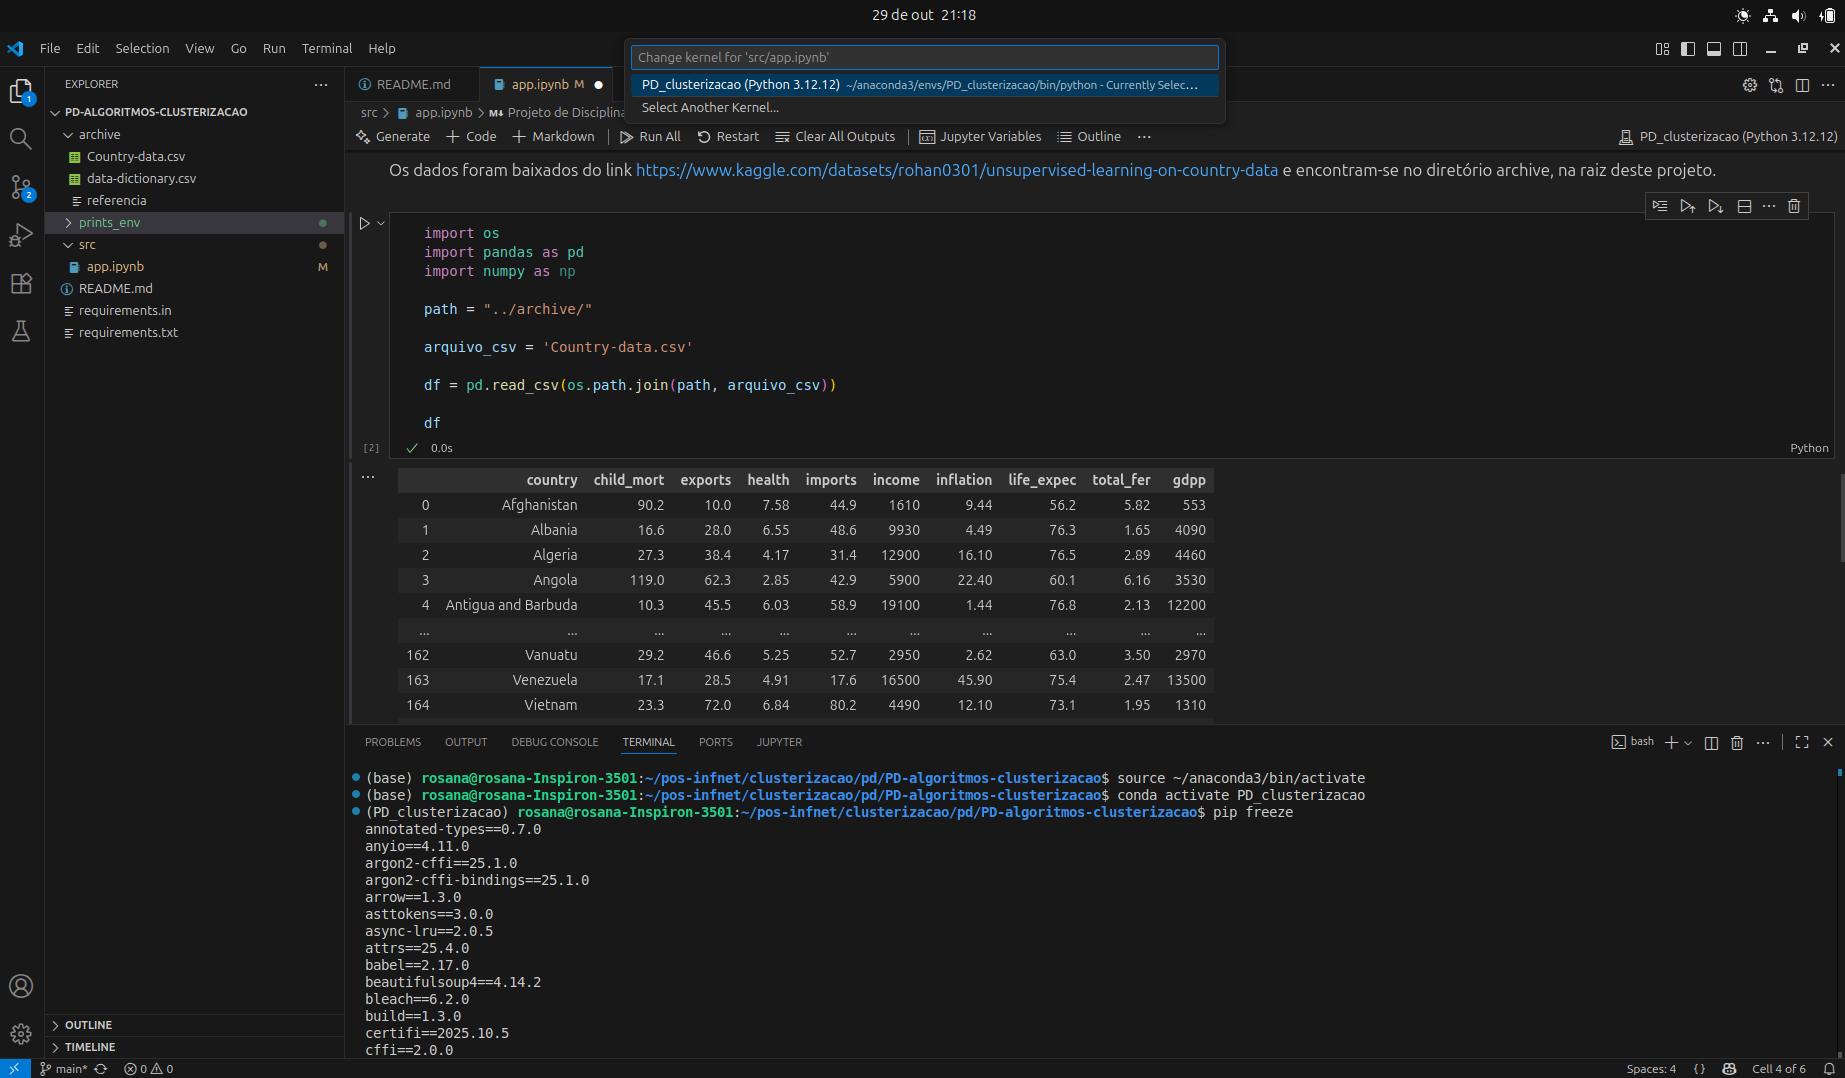

### Parte 2
#### 2.1.
Os dados foram baixados do link https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data e encontram-se no diretório archive, na raiz deste projeto.

In [35]:
import os
import pandas as pd
import numpy as np

path = "../archive/"

arquivo_csv = 'Country-data.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

#### 2.2. 

A fim de avaliar quantos países únicos existem no dataset, podemos fazer uma análise pela coluna "country", tanto por meio do value_counts() quanto por meio do nunique(). Após essa análise, é possível verificar que existem 167 países no dataset:

In [36]:

n_paises = df['country'].nunique()
print(df['country'].value_counts())
print(f"Número de países únicos: {n_paises}")


country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Vanuatu                1
Venezuela              1
Vietnam                1
Yemen                  1
Zambia                 1
Name: count, Length: 167, dtype: int64
Número de países únicos: 167


#### 2.3. 

A fim de mostrar através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização e analisar, vamos optar por realizar dois tipos de gráficos:
- boxplot
- histograma

Antes disso, porém, é necessário identificar quais variáveis serão utilizadas clusterização. No caso, convém utilizar todas as variáveis numéricas.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Identificamos que apenas country é uma variável nominal, e por isso não será utilizada na clusterização.

In [38]:
training_cols = df.select_dtypes(include=["number"]).columns
print('colunas numéricas, a serem utilizadas na clusterização:', training_cols.tolist() )

colunas numéricas, a serem utilizadas na clusterização: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


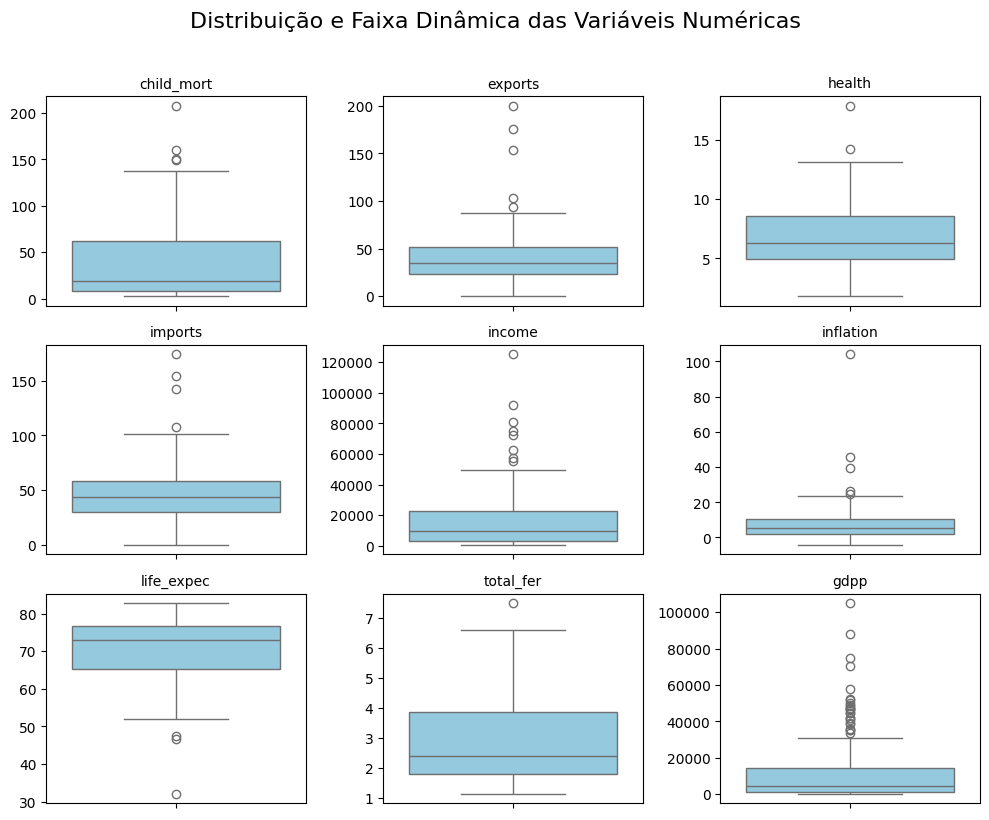

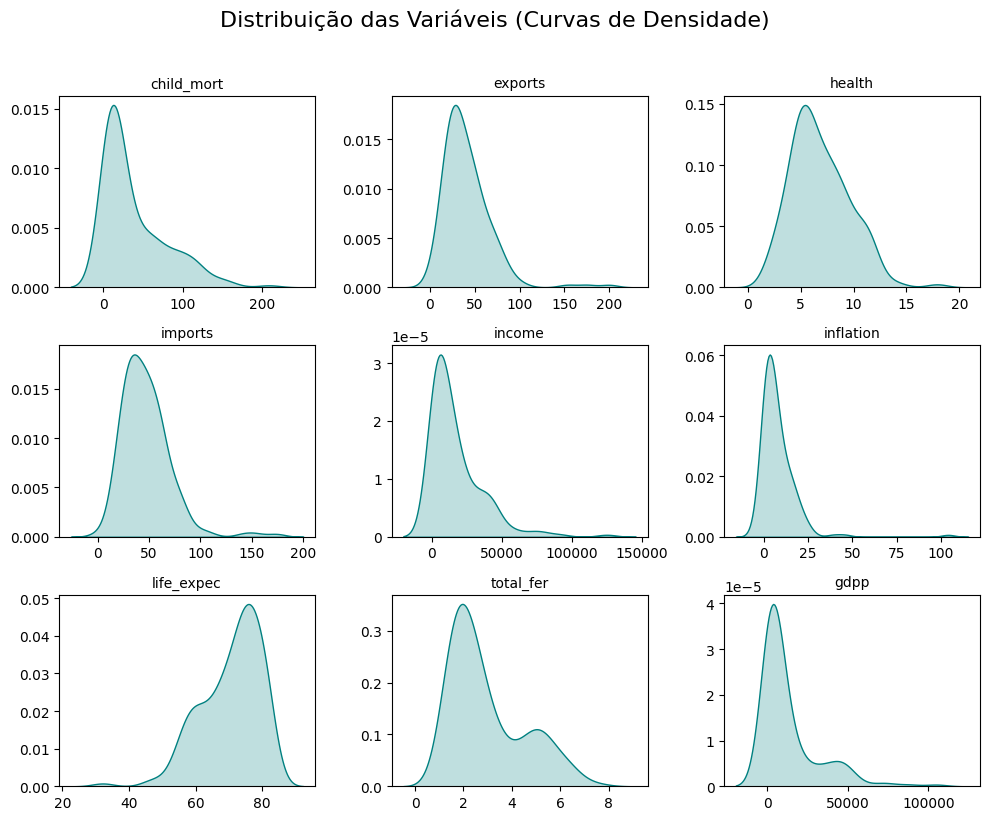

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()


##### Análise

Dos resultados dos histogramas e do boxplot, é possível fazer algumas observações:
- as escalas das variáveis são muito diferentes. Por exemplo, se compararmos o boxplot de income e de total_fer, veremos que as escalas são muito distintas (o primeiro tem valores muito mais elevados que o segundo). Isso pode interferir na clusterização ao usar algoritmos baseados em distância. Será necessário algum tipo de escalonamento para lidar com essa diferença;
- grande presença de outliers, que pode ser observado também nos boxplots, principalmente nos de gdpp, income e inflação. Isso mostra que será necessário adotar alguma estratégia para lidar com os outliers;
- pelos histogramas, é possível ver que, em geral, os dados seguem uma distribuição semelhante à distribuição normal. Assim, os principais ajustes necessários serão os já mencionados ajustes de outliers e de escala.

Uma opção então, que pode resolver o escalonamento e também lidar bem com os outliers é o RobustScaler. Isso porque o RobustScaler consegue lidar bem com outliers ao levar em consideração a mediana em vez da média e o intervalo interquartil em vez do desvio-padrão. Mas para confirmar essa opção, vamos fazer mais uma análise nos dados, que é a análise dos quartis e da mediana na distribuição de cada variável:

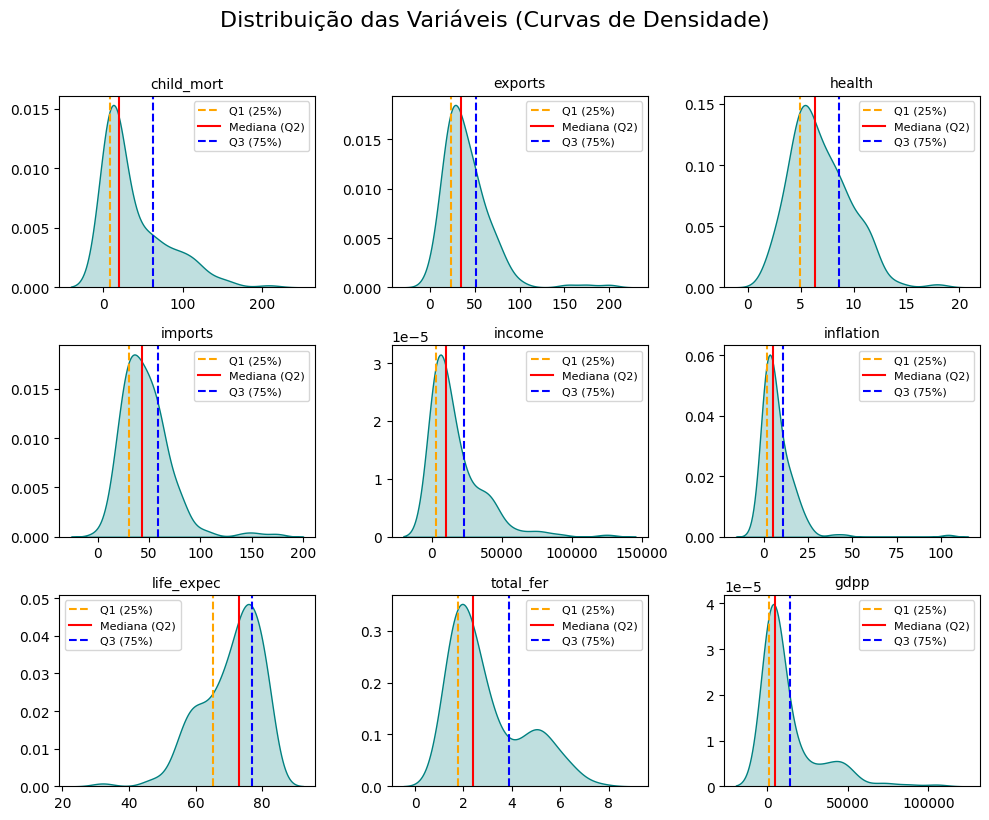

In [40]:
# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="teal")
    
    q1 = df[col].quantile(0.25)
    median = df[col].median()
    q3 = df[col].quantile(0.75)

    axes[i].axvline(q1, color="orange", linestyle="--", linewidth=1.5, label="Q1 (25%)")
    axes[i].axvline(median, color="red", linestyle="-", linewidth=1.5, label="Mediana (Q2)")
    axes[i].axvline(q3, color="blue", linestyle="--", linewidth=1.5, label="Q3 (75%)")
    
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

Pelos gráficos agora da distribuição mostrando as medianas e os Q1 (primeiro quartil) e Q3 (terceiro quartil), é possível confirmar então que o RobustScaler será uma boa forma de lidar com as diferenças de escala e com os outliers. Isso ocorre porque o escalonamento com o Robust Scaler é feito com essas medidas: intervalo interquatil (IIQ, que é a diferença entre Q3 e Q1) e mediana, que por si só são medidas bastante robustas à presença de outliers.

Outra forma de lidar com outliers poderia ser a sua remoção, mas essa pode ser uma medida não muito boa aqui, pois os outliers podem conter informações importantes no nosso dataset, e não é desejável perdê-las. Além disso, mais um ponto a favor do Robust Scaler é que este é um escalonamento estatisticamente muito útil para lidar dados com distribuição no formato de caudas longas, que é o caso de muitas variáveis desse dataset (como health, child_mort, life_expec e total_fer).

Antes de realizar o escalonamento, é importante ainda fazer a análise e tratamento de dados nulos e eventualmente dados repetidos, o que será verificado no item a seguir.

#### 2.4.

O pré-processamento dos dados consistirá nas seguintes etapas:
- análise e tratamento de dados nulos
- análise e tratamento de dados repetidos
- análise de correlação a fim de verificar se existem colunas altamente correlacionadas (redundantes) em que alguma delas possa ser removida sem prejuízo de informação
- escalonamento robusto

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [42]:
df = df.dropna() 
df = df.drop_duplicates()
print("Após tratamento, informações do DataFrame:")
df.info()

Após tratamento, informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


É possível ver que os dados não contém dados duplicados nem dados nulos, pois após a remoção de duplicatas e nulos, manteve o mesmo tamanho original (167 linhas).

Segue-se então para a próxima etapa, que é a análise de eventuais colunas altamente correlacionadas. Para isso, inicia-se com uma breve análise de pairplot, a fim de verificar visualmente como as variáveis tendem se comportar, duas a duas.

Em seguida, será feita a análise de correlação. com auxílio da função corr().

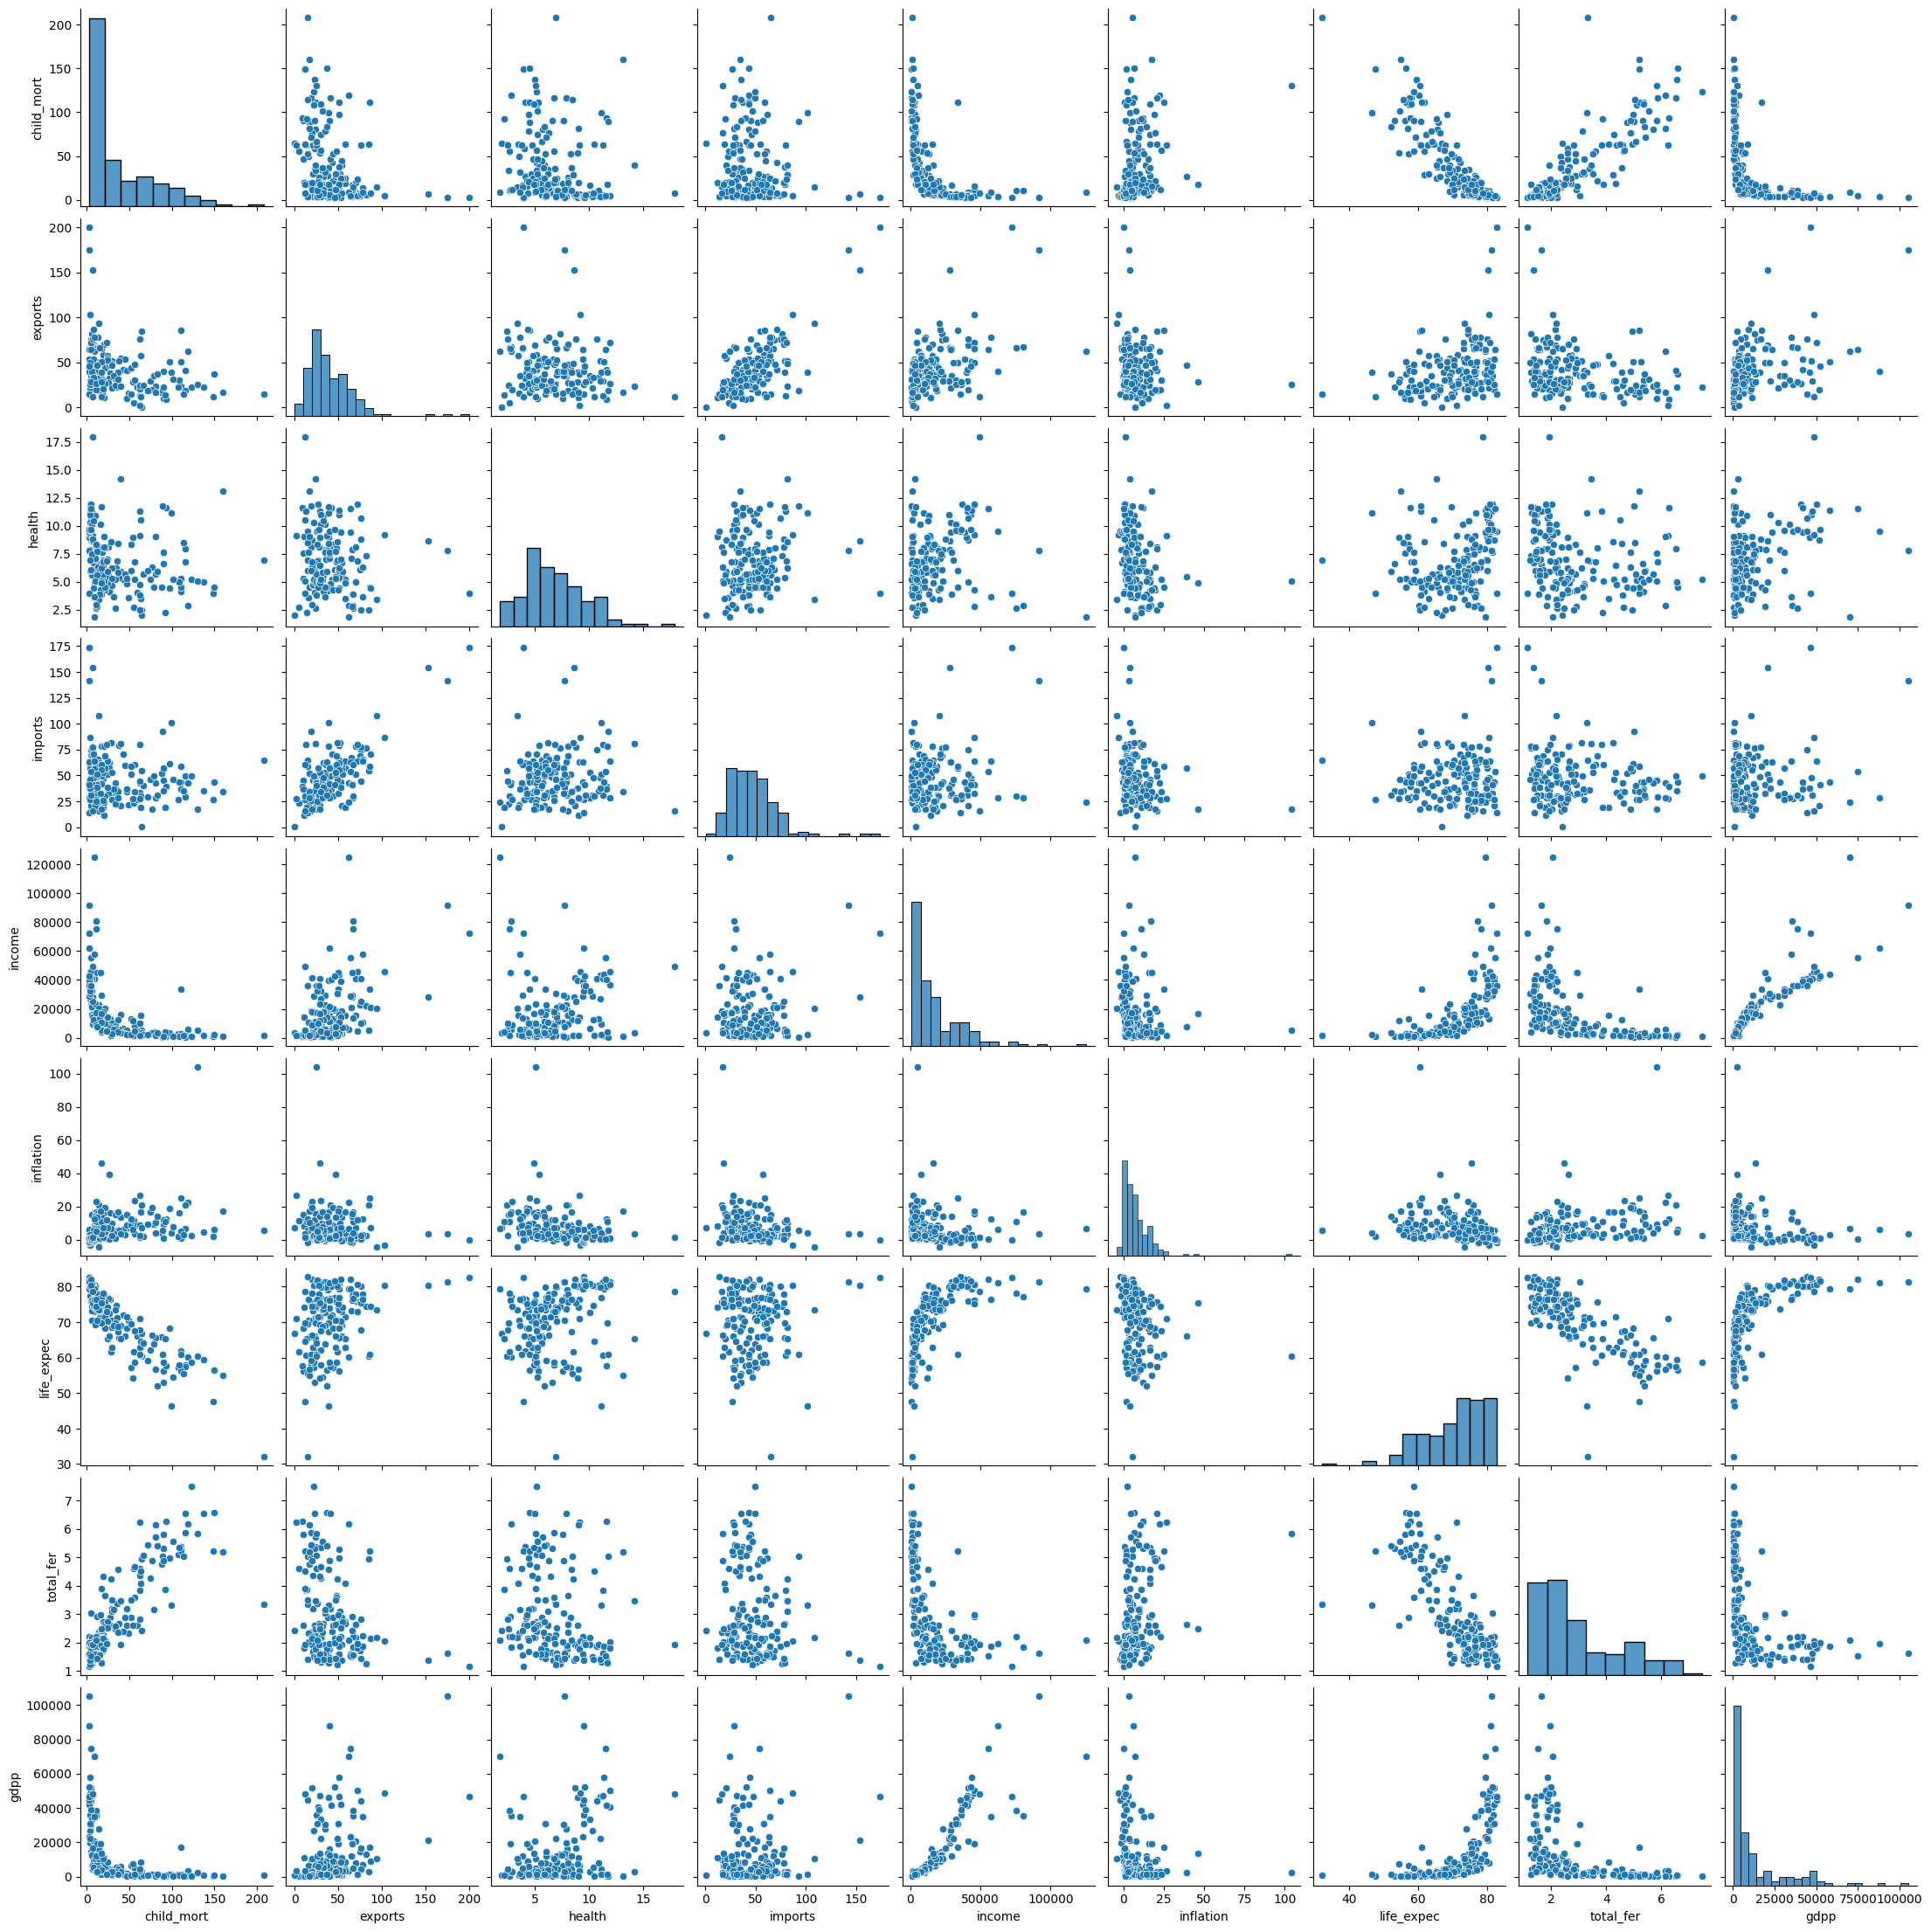

In [43]:
sns.pairplot(data=df[training_cols])
plt.show()

<Axes: >

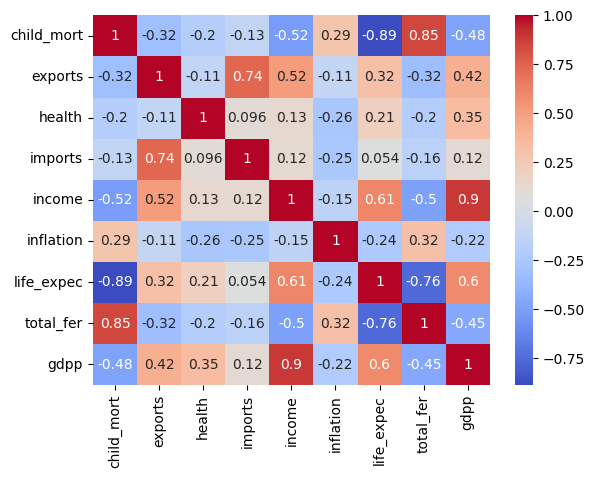

In [44]:
sns.heatmap(df[training_cols].corr(), annot=True, cmap='coolwarm')

É possível perceber que existem dois pares de variáveis altamente correlacionadas: 

- gdpp (gross domestic product per capita), ou PIB per capita e income (renda média ou mediana);
- life_expec (expectativa de vida) e child_mort (mortalidade infantil).

Faz sentido que esses dois pares mostrem variáveis que estão altamente correlacionadas. É necessário, a fim de saber se devem ser mantidas, analisar se uma eventual redundância de informações ao mantê-las é mais ou menos prejudicial do que a perca de eventuais informações ao remover alguma delas.

Analisando semanticamente, gdpp é uma métrica macroeconômica (produção nacional média), enquanto o income é uma métrica microeconômica (quanto as pessoas ganham). Elas tendem a se mover juntas, mas não necessariamente, especialmente para países com alta desigualdade, que podem ter um PIB per capita alto e um income mais baixo. Na maioria dos casos, elas se movem juntas, mas não sempre. Assim, para não perder essa informação, por ora ambos serão mantidos.

De forma semelhante, faz sentido que a expectativa de vida e a mortalidade infantil andem juntos (no caso, quanto maior a mortalidade infantil, menor deve ser a expectativa de vida). Porém, além da mortalidade infantil, outras podem ser as causas de uma expectativa de vida mais baixa, como a violência urbana, o estilo de vida, entre outros. Assim, a fim de não perder informação, também serão mantidas ambas.

A próxima etapa será então a aplicação do escalonador robusto:

In [45]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[training_cols] = scaler.fit_transform(df[training_cols])

df_scaled.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.316620 -0.907441  0.342391  0.056042 -0.429416   
1              Albania   -0.050139 -0.254083  0.062500  0.185639 -0.001543   
2              Algeria    0.148561  0.123412 -0.584239 -0.416813  0.151196   
3               Angola    1.851439  0.990926 -0.942935 -0.014011 -0.208794   
4  Antigua and Barbuda   -0.167131  0.381125 -0.078804  0.546410  0.470044   

   inflation  life_expec  total_fer      gdpp  
0   0.453020   -1.469565   1.635492 -0.322877  
1  -0.100671    0.278261  -0.364508 -0.044811  
2   1.197987    0.295652   0.230216 -0.015723  
3   1.902685   -1.130435   1.798561 -0.088836  
4  -0.441834    0.321739  -0.134293  0.592767

Por fim, verificando novamente a distribuição dos dados, dessa vez após o escalonamento:

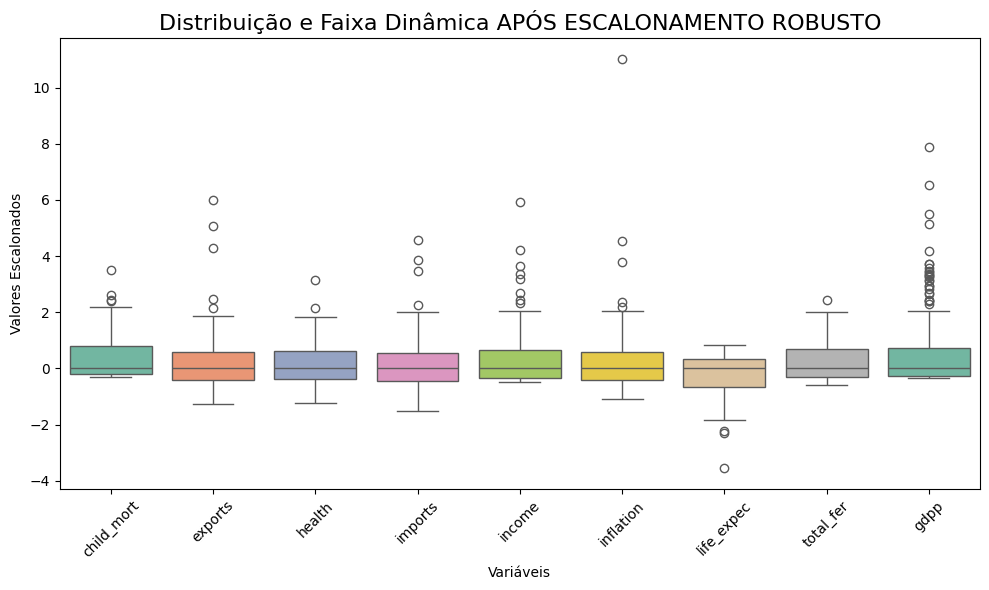

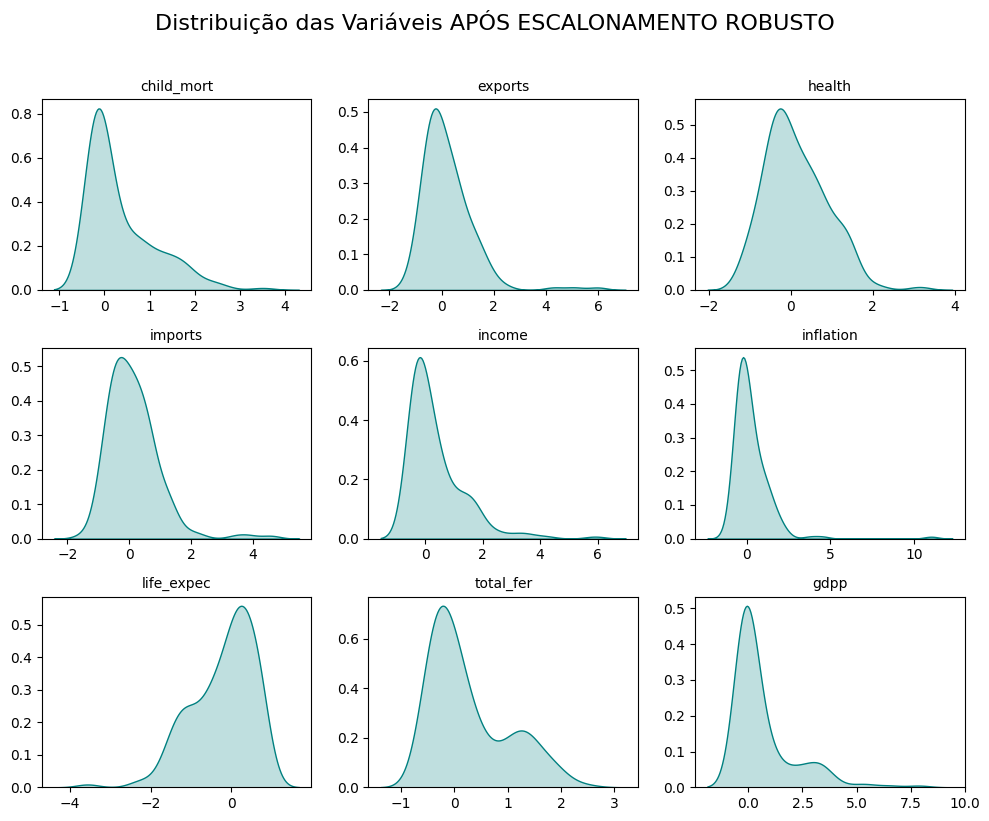

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled[training_cols], palette="Set2")

plt.title("Distribuição e Faixa Dinâmica APÓS ESCALONAMENTO ROBUSTO", fontsize=16)
plt.xlabel("Variáveis")
plt.ylabel("Valores Escalonados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis APÓS ESCALONAMENTO ROBUSTO", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.kdeplot(df_scaled[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()


Podemos perceber, como já visto e explicado acima, que as variáveis estão bem distribuídas, com distribuição próxima à normal, porém em muitos casos com a cauda alongada. Isso é notável especialmente em total_fer, life_expec, gdpp, health e child_mort.

### Parte 3

#### 3.1.
##### a) Clusterização utilizando K-Means

In [47]:
training_data = df_scaled[training_cols]
training_data

child_mort   exports    health   imports    income  inflation  \
0      1.316620 -0.907441  0.342391  0.056042 -0.429416   0.453020   
1     -0.050139 -0.254083  0.062500  0.185639 -0.001543  -0.100671   
2      0.148561  0.123412 -0.584239 -0.416813  0.151196   1.197987   
3      1.851439  0.990926 -0.942935 -0.014011 -0.208794   1.902685   
4     -0.167131  0.381125 -0.078804  0.546410  0.470044  -0.441834   
..          ...       ...       ...       ...       ...        ...   
162    0.183844  0.421053 -0.290761  0.329247 -0.360504  -0.309843   
163   -0.040854 -0.235935 -0.383152 -0.900175  0.336333   4.531320   
164    0.074280  1.343013  0.141304  1.292469 -0.281306   0.750559   
165    0.687094 -0.181488 -0.309783 -0.311734 -0.281821   2.036913   
166    1.184773  0.072595 -0.116848 -0.434326 -0.343533   0.963087   

     life_expec  total_fer      gdpp  
0     -1.469565   1.635492 -0.322877  
1      0.278261  -0.364508 -0.044811  
2      0.295652   0.230216 -0.015723  
3     -1.130435   1.798561 -0.088836  
4      0.321739  -0.134293  0.592767  
..          ...        ...       ...  
162   -0.878261   0.522782 -0.132862  
163    0.200000   0.028777  0.694969  
164    0.000000  -0.220624 -0.263365  
165   -0.486957   1.083933 -0.263365  
166   -1.834783   1.434053 -0.251572  

[167 rows x 9 columns]

In [48]:
from sklearn.cluster import KMeans

df_kmeans = KMeans(n_clusters=3, random_state=101).fit(training_data)

df_scaled['cluster_kmeans'] = df_kmeans.labels_
df['cluster_kmeans'] = df_kmeans.labels_


##### b) Clusterização Hierárquica

In [49]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(training_data)

df_scaled['ward'] = ward.labels_
df['ward'] = ward.labels_

**Após realizar tanto a clusterização com KMeans (ou K Médias) quanto a clusterização hierárquica, teremos os respectivos clusters representados pelas colunas cluster_kmeans e ward, respectivamente**:

In [50]:
df_scaled.head(25)

country  child_mort   exports    health   imports  \
0              Afghanistan    1.316620 -0.907441  0.342391  0.056042   
1                  Albania   -0.050139 -0.254083  0.062500  0.185639   
2                  Algeria    0.148561  0.123412 -0.584239 -0.416813   
3                   Angola    1.851439  0.990926 -0.942935 -0.014011   
4      Antigua and Barbuda   -0.167131  0.381125 -0.078804  0.546410   
5                Argentina   -0.089136 -0.584392  0.483696 -0.956217   
6                  Armenia   -0.022284 -0.515426 -0.521739  0.070053   
7                Australia   -0.269266 -0.551724  0.654891 -0.784588   
8                  Austria   -0.278552  0.591652  1.271739  0.157618   
9               Azerbaijan    0.369545  0.700544 -0.119565 -0.791594   
10                 Bahamas   -0.102136  0.000000  0.426630  0.014011   
11                 Bahrain   -0.198700  1.252269 -0.366848  0.266200   
12              Bangladesh    0.558960 -0.689655 -0.760870 -0.753065   
13                Barbados   -0.094708  0.163339  0.448370  0.189142   
14                 Belarus   -0.256267  0.595281 -0.192935  0.742557   
15                 Belgium   -0.274838  1.502722  1.190217  1.099825   
16                  Belize   -0.009285  0.842105 -0.304348  0.497373   
17                   Benin    1.702878 -0.406534 -0.603261 -0.213660   
18                  Bhutan    0.434540  0.272232 -0.304348  0.959720   
19                 Bolivia    0.506964  0.225045 -0.402174 -0.315236   
20  Bosnia and Herzegovina   -0.230269 -0.192377  1.298913  0.280210   
21                Botswana    0.616527  0.312160  0.538043  0.280210   
22                  Brazil    0.009285 -0.882033  0.730978 -1.103327   
23                  Brunei   -0.163417  1.176044 -0.945652 -0.535902   
24                Bulgaria   -0.157846  0.551724  0.149457  0.339755   

      income  inflation  life_expec  total_fer      gdpp  cluster_kmeans  ward  
0  -0.429416   0.453020   -1.469565   1.635492 -0.322877               1     1  
1  -0.001543  -0.100671    0.278261  -0.364508 -0.044811               0     2  
2   0.151196   1.197987    0.295652   0.230216 -0.015723               0     2  
3  -0.208794   1.902685   -1.130435   1.798561 -0.088836               1     2  
4   0.470044  -0.441834    0.321739  -0.134293  0.592767               0     2  
5   0.449473   1.734899    0.234783  -0.019185  0.443396               0     2  
6  -0.167652   0.266219    0.017391  -0.345324 -0.113208               0     2  
7   1.616868  -0.473154    0.773913  -0.230216  3.713836               2     0  
8   1.709437  -0.505257    0.643478  -0.465228  3.320755               2     0  
9   0.310620   0.940716   -0.347826  -0.235012  0.092767               0     2  
10  0.665467  -0.646868    0.060870  -0.263789  1.834906               0     0  
11  1.601440   0.229306    0.252174  -0.119904  1.261006               0     0  
12 -0.386732   0.195749   -0.234783  -0.038369 -0.306761               0     2  
13  0.274621  -0.567002    0.313043  -0.302158  0.891509               0     2  
14  0.320905   1.086130   -0.234783  -0.441247  0.107704               0     2  
15  1.601440  -0.392617    0.600000  -0.263789  3.124214               2     0  
16 -0.106968  -0.475391   -0.147826   0.143885 -0.025157               0     2  
17 -0.418617  -0.503915   -0.982609   1.414868 -0.306761               1     1  
18 -0.182052   0.067114   -0.086957  -0.014388 -0.194969               0     2  
19 -0.233993   0.379195   -0.130435   0.378897 -0.210692               0     2  
20 -0.012343  -0.446309    0.321739  -0.527578 -0.003931               0     2  
21  0.171767   0.394855   -1.391304   0.225420  0.132862               1     2  
22  0.233479   0.337808    0.095652  -0.292566  0.514151               0     2  
23  3.632810   1.265101    0.347826  -0.273381  2.408805               2     0  
24  0.274621  -0.478747    0.069565  -0.402878  0.171384               0     2

#### 3.2. Análise dos resultados do K-Médias (KMeans)

Vamos fazer uma análise para compreender as principais características da separação usando K-Médias. Para isso, vamos calcular as médias das variáveis de cada cluster (ou seja, o centroide de cada cluster) e compará-las. 

Antes disso, porém, foi feita a separação dos dados de cada cluster, a fim de aplicar a função describe() nesses dados e ter um rápido olhar sobre as características de cada cluster:

In [51]:
df_kmeans_cluster0 = df[df['cluster_kmeans'] == 0]
df_kmeans_cluster1 = df[df['cluster_kmeans'] == 1]
df_kmeans_cluster2 = df[df['cluster_kmeans'] == 2]

In [52]:
print("KMeans - Cluster 0:")
df_kmeans_cluster0[training_cols].describe()



KMeans - Cluster 0:


child_mort    exports     health     imports        income  inflation  \
count   86.000000  86.000000  86.000000   86.000000     86.000000  86.000000   
mean    19.374419  42.830233   6.503953   49.079070  14131.279070   6.084884   
std     12.654441  18.714795   2.218256   19.221404   9225.827276   5.643355   
min      3.200000  10.700000   2.500000   11.800000   1780.000000  -4.210000   
25%     10.300000  27.925000   5.070000   33.550000   7312.500000   1.725000   
50%     16.900000  39.350000   6.215000   49.400000  11300.000000   4.465000   
75%     24.850000  53.400000   7.850000   62.100000  19000.000000   8.520000   
max     62.000000  93.800000  14.200000  108.000000  45400.000000  22.800000   

       life_expec  total_fer          gdpp  
count   86.000000  86.000000     86.000000  
mean    73.387209   2.232093   7932.953488  
std      4.281638   0.722638   6334.600660  
min     58.600000   1.230000    758.000000  
25%     70.700000   1.590000   3222.500000  
50%     74.100000   2.150000   5645.000000  
75%     76.375000   2.657500  11100.000000  
max     80.400000   4.340000  28000.000000

In [53]:
print("KMeans - países do Cluster 0:")
print(df_kmeans_cluster0['country'].values)

KMeans - países do Cluster 0:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Georgia' 'Greece' 'Grenada' 'Guatemala' 'Guyana'
 'Hungary' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Montenegro' 'Morocco' 'Namibia' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'Slovak Republic' 'Slovenia'
 'Solomon Islands' 'South Korea' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Thailand' 'Tonga' 'Tunisia'
 'Turkey' 'Turkmenistan' 'U

In [54]:
print("\nKMeans - Cluster 1:")
df_kmeans_cluster1[training_cols].describe()




KMeans - Cluster 1:


child_mort    exports     health     imports        income   inflation  \
count   52.000000  52.000000  52.000000   52.000000     52.000000   52.000000   
mean    88.057692  27.782673   6.174615   40.864729   4101.403846   13.270865   
std     35.587216  17.990656   2.630810   18.338730   5639.102172   15.869033   
min     17.100000   0.109000   1.970000    0.065900    609.000000    0.885000   
25%     62.675000  16.200000   4.502500   28.975000   1405.000000    4.352500   
50%     85.650000  23.300000   5.275000   38.200000   2040.000000    9.225000   
75%    111.000000  36.850000   7.715000   49.375000   4055.000000   16.600000   
max    208.000000  85.800000  13.100000  101.000000  33700.000000  104.000000   

       life_expec  total_fer          gdpp  
count   52.000000  52.000000     52.000000  
mean    60.301923   4.769615   2018.846154  
std      6.938879   1.233040   3222.945154  
min     32.100000   2.410000    231.000000  
25%     57.025000   4.022500    559.750000  
50%     60.600000   5.000000    932.000000  
75%     65.350000   5.462500   1465.000000  
max     75.400000   7.490000  17100.000000

In [55]:
print("KMeans - países do Cluster 1:")
print(df_kmeans_cluster1['country'].values)

KMeans - países do Cluster 1:
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mongolia' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Venezuela' 'Yemen'
 'Zambia']


In [56]:
print("\nKMeans - Cluster 2:")
df_kmeans_cluster2[training_cols].describe()



KMeans - Cluster 2:


child_mort     exports     health     imports         income  \
count   29.000000   29.000000  29.000000   29.000000      29.000000   
mean     5.031034   59.900000   8.889655   51.203448   49468.965517   
std      2.249461   45.797856   3.416279   40.487101   21470.745936   
min      2.600000   12.400000   1.810000   13.600000   28300.000000   
25%      3.600000   29.100000   7.770000   28.000000   36200.000000   
50%      4.300000   50.200000   9.490000   37.100000   41400.000000   
75%      5.600000   67.400000  11.000000   57.500000   55500.000000   
max     10.800000  200.000000  17.900000  174.000000  125000.000000   

       inflation  life_expec  total_fer           gdpp  
count  29.000000   29.000000  29.000000      29.000000  
mean    2.971759   80.544828   1.804483   47510.344828  
std     4.281540    1.516713   0.375676   17737.638449  
min    -3.220000   76.500000   1.150000   21100.000000  
25%     0.758000   80.000000   1.460000   35800.000000  
50%     1.570000   80.700000   1.870000   44500.000000  
75%     3.730000   81.500000   1.980000   50300.000000  
max    16.700000   82.800000   3.030000  105000.000000

In [57]:
print("KMeans - países do Cluster 2:")
print(df_kmeans_cluster2['country'].values)

KMeans - países do Cluster 2:
['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kuwait' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway'
 'Qatar' 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']


Esses resultados já demonstram algumas informações importantes sobre cada cluster. Porém, para tornar essas informações ainda mais visuais, vamos analisar alguns gráficos.

Primeiro, vamos analisar o pairplot com as variáveis, representando cada cluster de uma cor diferente:
- cluster 0: cor vermelha
- cluster 1: cor azul
- cluster 2: cor verde

Em seguida, faremos a mesma coisa mas com o boxplot mostrando a distribuição dessas variáveis.

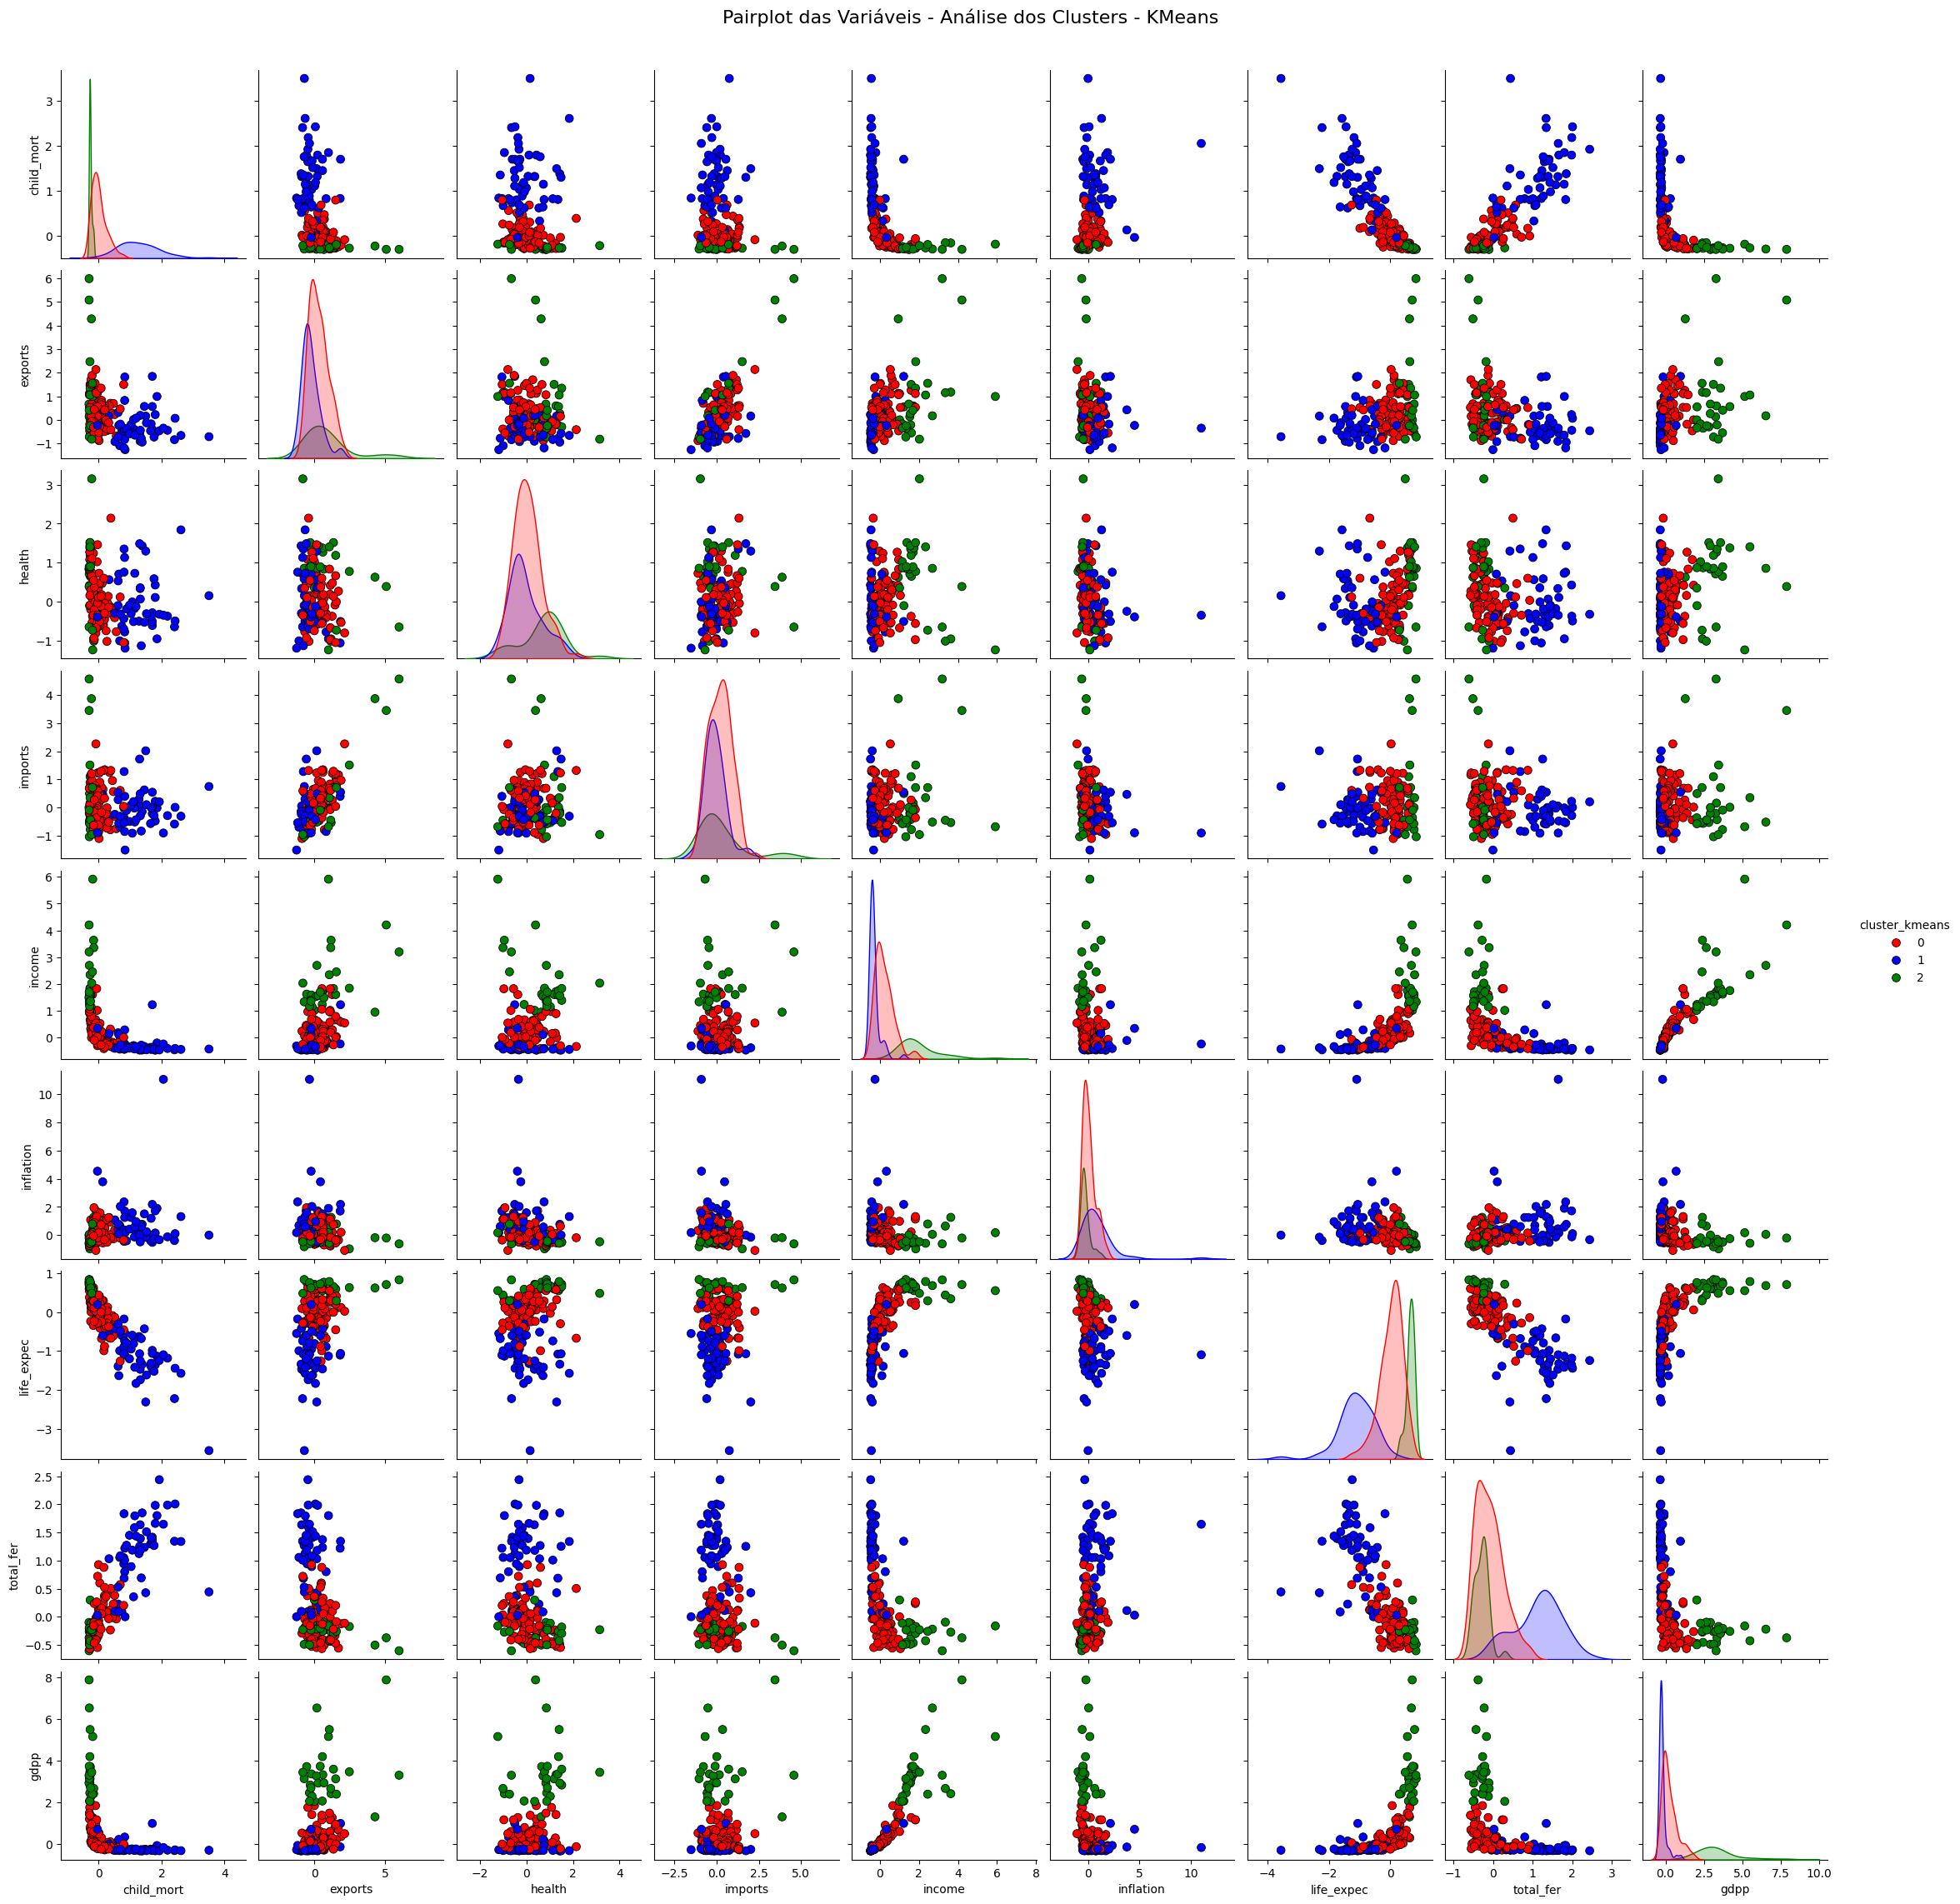

In [58]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green'
}

sns.pairplot(
    data=df_scaled,
    vars=training_cols,
    hue='cluster_kmeans',
    palette=cluster_colors, 
    diag_kind='kde',
    plot_kws={'alpha': 1, 's': 50, 'edgecolor': 'k'}  
)

plt.suptitle('Pairplot das Variáveis - Análise dos Clusters - KMeans', y=1.02, fontsize=16)
plt.show()

/tmp/ipykernel_6284/2376264666.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scaled, x='cluster_kmeans', y=column, ax=ax[i], palette=cluster_colors)
/tmp/ipykernel_6284/2376264666.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scaled, x='cluster_kmeans', y=column, ax=ax[i], palette=cluster_colors)
/tmp/ipykernel_6284/2376264666.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scaled, x='cluster_kmeans', y=column, ax=ax[i], palette=cluster_colors)
/tmp/ipykernel_6284/2376264666.py:11: FutureWarning: 



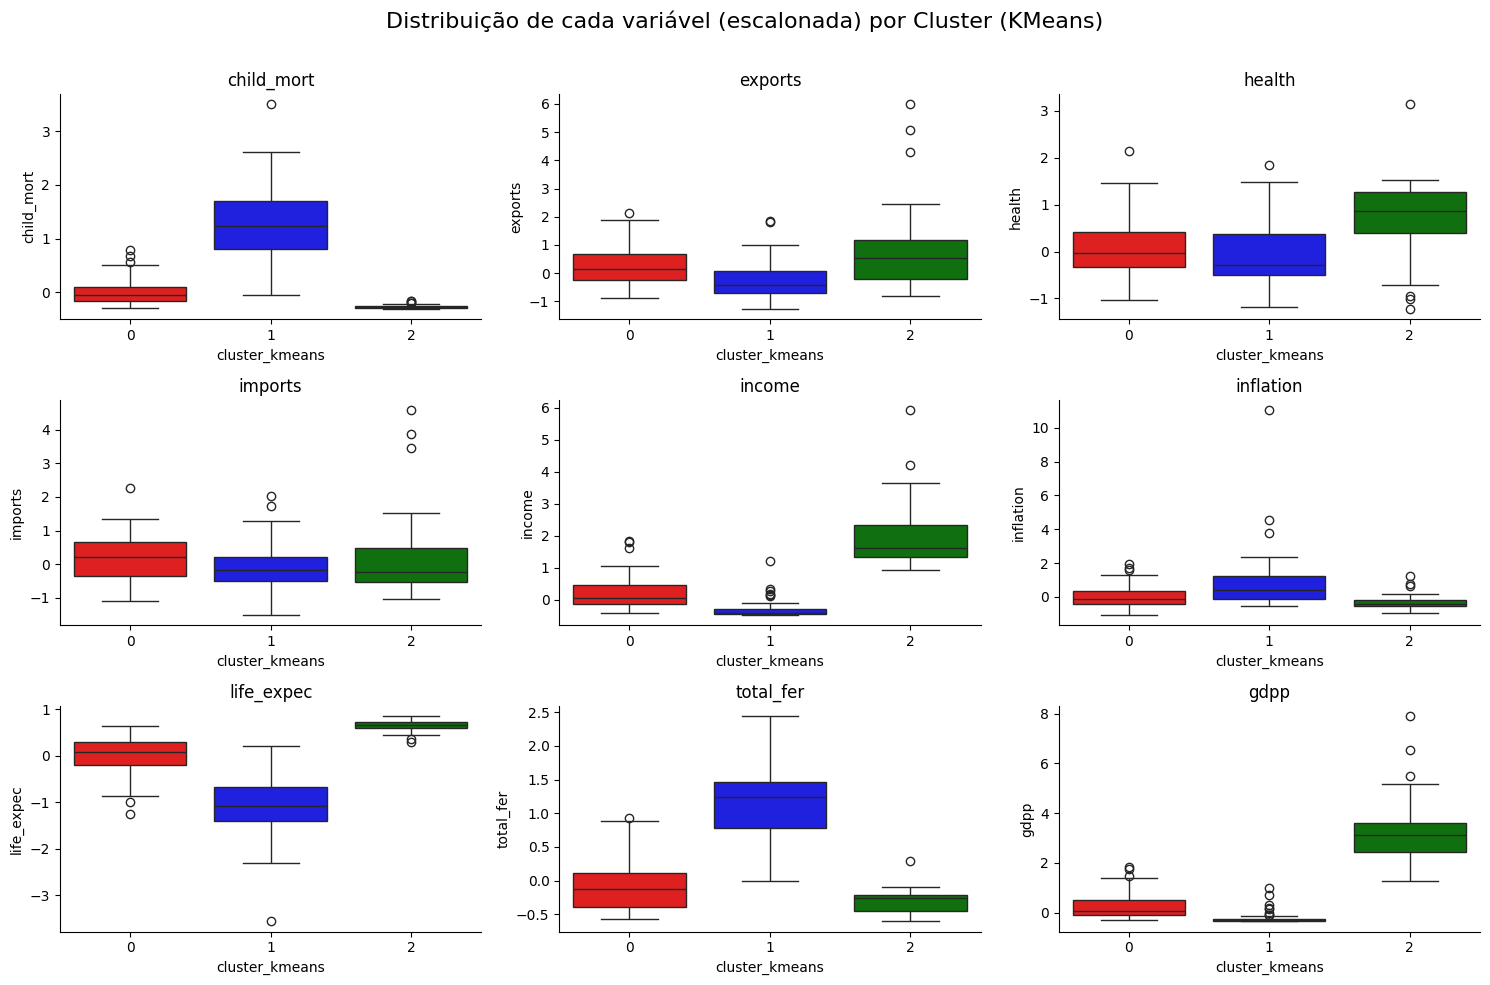

In [59]:
cluster_colors = {
    '0': 'red',
    '1': 'blue',
    '2': 'green'
}

f, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten() 

for i, column in enumerate(training_cols):
    sns.boxplot(data=df_scaled, x='cluster_kmeans', y=column, ax=ax[i], palette=cluster_colors)
    ax[i].set_title(column)

for j in range(len(training_cols), len(ax)):
    ax[j].set_visible(False)

f.suptitle('Distribuição de cada variável (escalonada) por Cluster (KMeans)', fontsize=16)

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

Agora, vamos calcular a média das variáveis dos clusters e apresentá-los em um gráfico. A fim de melhorar a visualização, vamos utilizar os dados dos países em escala. Ao calcular essas médias, encontramos os dados do centroide de cada cluster, e podemos em seguida plotar esses dados em gráficos para analisar as principais características de cada cluster:

In [60]:
cluster_means_scaled = df_scaled.groupby('cluster_kmeans').mean(numeric_only=True)
cluster_means_scaled.drop(columns=['ward'], inplace=True)
cluster_means_scaled

child_mort   exports    health   imports    income  inflation  \
cluster_kmeans                                                                  
0                 0.001382  0.284219  0.049987  0.202419  0.214517   0.077727   
1                 1.276837 -0.261972 -0.039507 -0.085298 -0.301291   0.881529   
2                -0.264976  0.903811  0.698276  0.276828  2.031832  -0.270497   

                life_expec  total_fer      gdpp  
cluster_kmeans                                   
0                 0.024975  -0.085327  0.257308  
1                -1.112876   1.131710 -0.207638  
2                 0.647376  -0.290416  3.368738

/tmp/ipykernel_6284/1347696216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')
/tmp/ipykernel_6284/1347696216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')
/tmp/ipykernel_6284/1347696216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')


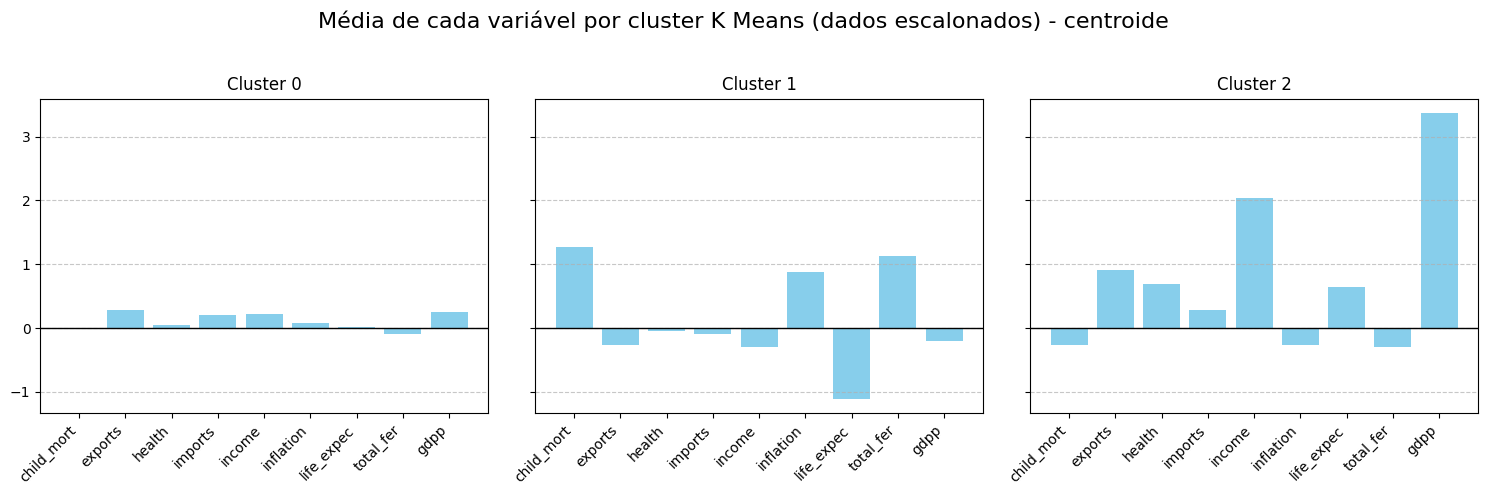

In [61]:
n_clusters = df_scaled['cluster_kmeans'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['cluster_kmeans'].unique())):
    axes[i].bar(cluster_means_scaled.columns, cluster_means_scaled.loc[cluster], color='skyblue')
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Média de cada variável por cluster K Means (dados escalonados) - centroide", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Ao final de todas essas análises, é possível resumir portanto as características mais marcantes de cada cluster:

- Cluster 0: maior grupo do dataset, abrigando 86 países. Caracterizado por métricas em geral intermediárias dos dados, como baixa/intermediária mortalidade infantil, intermediária expectativa de vida, PIB per capita baixo/intermediário, inflação intermediária. Pode-se considerar que abriga em geral países em desenvolvimento que estejam com seus índices na média, entre o cluster 1 e o cluster 2.
- Cluster 1: abriga 52 países. Caracterizado por métricas em geral negativas, como: alta mortalidade infantil, baixa expectativa de vida, alto número de filhos por mulher fértil (total_fer), alta inflação, pouca exportação e baixo PIB per capita. Pode-se considerar que tratam-se, em sua maioria, de países subdesenvolvidos muito pobres.
- Cluster 2: abriga 29 países. Caracterizado em geral por métricas positivas, como: baixa mortalidade infantil, alto número de exportações, alto índice de saúde, alta renda, muito alto PIB per capita, alta expectativa de vida. Em geral, tratam-se de países desenvolvidos.

Vamos verificar agora qual país é o mais representativo de cada cluster. Para isso, vamos utilizar duas estratégias diferentes e depois eleger qual a melhor:
- a **primeira estratégia** será procurar encontrar o país mais próximo do centroide de cada cluster. Isso será feito calculando a distância euclidiana de cada país em relação ao centroide do seu cluster e encontrar aquele que minimiza o valor dessa distância.
- a **segunda estratégia** será pelo cálculo da medoide, ou seja, do ponto do cluster com menor soma da distância em relação aos outros pontos.

##### Cálculo dos países cujo ponto é o mais próximo do centroide

In [62]:
import numpy as np
import pandas as pd

representative_countries_1 = []

for cluster in sorted(df_scaled['cluster_kmeans'].unique()):
    # Dados de cada cluster
    cluster_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    
    # Média do cluster - centroide
    cluster_mean = cluster_means_scaled.loc[cluster, training_cols]
    
    # distância euclidiana de cada país à média do cluster usando apenas as colunas de treinamento definidas anteriormente
    distances = np.linalg.norm(cluster_data[training_cols] - cluster_mean, axis=1)
    distances = pd.Series(distances, index=cluster_data.index) 
    
    # País com menor distância ao centroide de cada cluster
    closest_country = cluster_data.loc[distances.idxmin(), 'country']
    representative_countries_1.append((cluster, closest_country))

print("========Países cujo ponto é o mais próximo do centroide ========")
for cluster, country in representative_countries_1:
    print(f"Cluster {cluster}: {country}")


========Países cujo ponto é o mais próximo do centroide ========
Cluster 0: Suriname
Cluster 1: Ghana
Cluster 2: Austria


/tmp/ipykernel_6284/927156488.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_6284/927156488.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_6284/927156488.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')


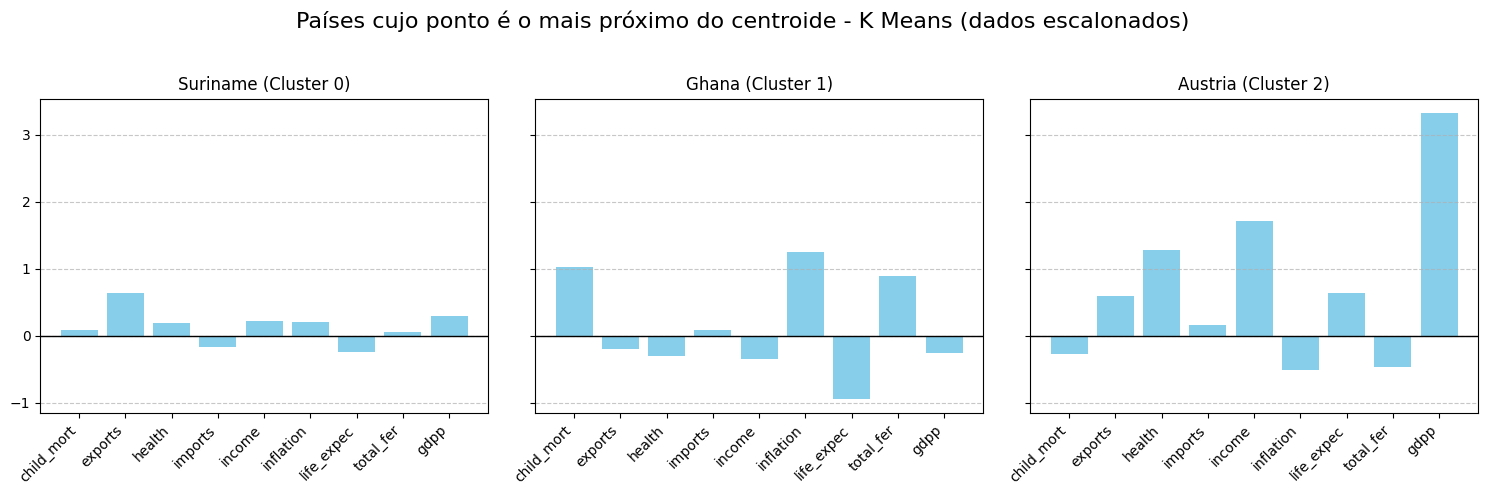

In [63]:

n_clusters = df_scaled['cluster_kmeans'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['cluster_kmeans'].unique())):
    
    country_name = [c for cl, c in representative_countries_1 if cl == cluster][0]
    country_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    country_data = country_data[country_data['country'] == country_name]
    
    values = country_data[training_cols].iloc[0]

    axes[i].bar(training_cols, values, color='skyblue')
    axes[i].set_title(f"{country_name} (Cluster {cluster})")
    axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Países cujo ponto é o mais próximo do centroide - K Means (dados escalonados)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




Os gráficos acima demontram ser muito semelhantes aos que foram plotados anteriormente com as médias de cada cluster, comprovando portanto que tais países são bons candidatos a representantes de seus respectivos clusters.

##### Cálculo dos países representativos encontrando ponto medoide

Agora vamos encontrar o país representativo de cada cluster utilizando o cálculo do ponto medoide (segunda estratégia), ou seja, o país cujo ponto minimiza a soma das distâncias entre ele e os demais pontos do cluster:

In [64]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

representative_countries_2 = []

for cluster in sorted(df_scaled['cluster_kmeans'].unique()):
    # Dados de cada cluster
    cluster_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    cluster_points = cluster_data[training_cols].values
    
    # matriz de distâncias entre os pontos no cluster
    dist_matrix = cdist(cluster_points, cluster_points, metric='euclidean')
    
    # soma das distâncias de cada ponto em relação aos outros
    sum_distances = dist_matrix.sum(axis=1)
    
    # encontrando o medoide (menor soma de distâncias)
    medoid_index = np.argmin(sum_distances)
    medoid_country = cluster_data.iloc[medoid_index]['country']
    
    representative_countries_2.append((cluster, medoid_country))

print("========Países representativos de cada cluster K Means - usando medoide ========")
for cluster, country in representative_countries_2:
    print(f"Cluster {cluster}: {country}")


========Países representativos de cada cluster K Means - usando medoide ========
Cluster 0: Tunisia
Cluster 1: Tanzania
Cluster 2: Finland


/tmp/ipykernel_6284/3215900492.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_6284/3215900492.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_6284/3215900492.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')


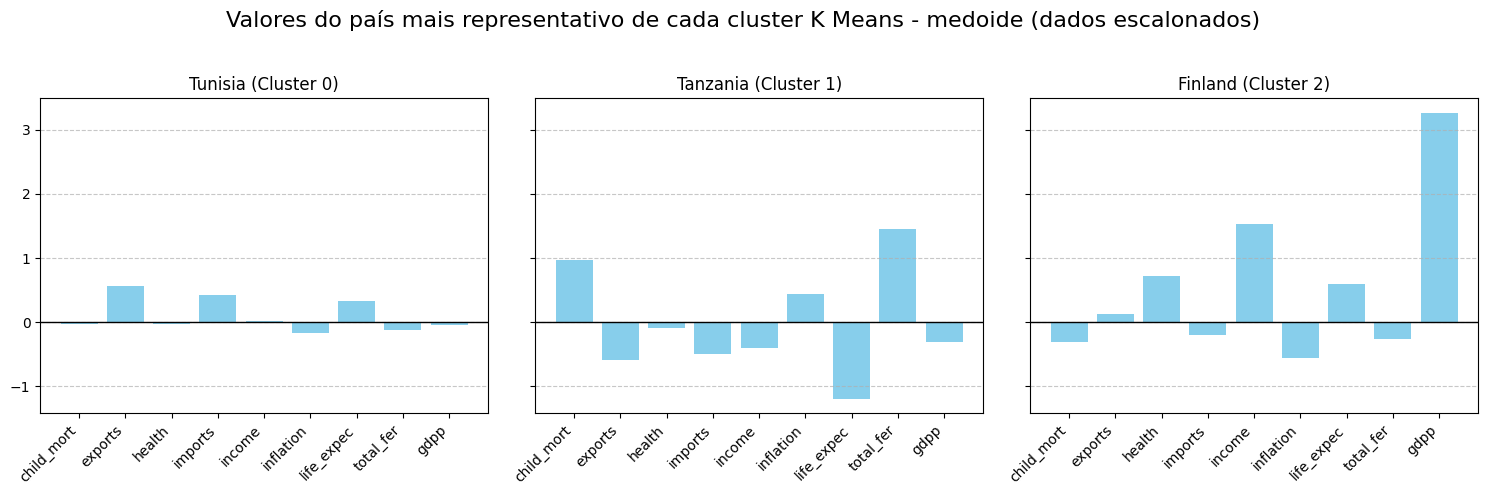

In [65]:

n_clusters = df_scaled['cluster_kmeans'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['cluster_kmeans'].unique())):
    
    country_name = [c for cl, c in representative_countries_2 if cl == cluster][0]
    country_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    country_data = country_data[country_data['country'] == country_name]
    
    values = country_data[training_cols].iloc[0]

    axes[i].bar(training_cols, values, color='skyblue')
    axes[i].set_title(f"{country_name} (Cluster {cluster})")
    axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Valores do país mais representativo de cada cluster K Means - medoide (dados escalonados)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Ambas as estratégias adotadas são boas candidatas para escolher o país representante de cada cluster.
Podemos observar que o cálculo do medoide também demonstrou resultados compatíveis com o centroide calculado. E será ela a estratégia (cálculo dos medoides) escolhida como a principal a fim de determinar os **países mais representativos de cada cluster, que portanto serão Tunísia (cluster 0), Tanzânia (cluster 1) e Finlândia (cluster 2)**. Isso por alguns motivos:
- O cálculo do medoide captura uma noção mais global e **real** de centralidade no cluster, levando em conta todos os pontos ao redor, e não um centroide abstrato.
- além disso, o cálculo do **medoide é mais robusto a eventuais outliers**, diferente do centroide. Enquanto o cálculo do centroide pode ser afetado por valores extremos (pois valores extremos podem acabar distorcendo a média, e portanto o centroide), o medoide por sua vez considera a estrutura coletiva do cluster, vai procurar o ponto que mais se aproxime de **todos**.


#### 3.3 - Dendograma e análise da clusterização hierárquica
Para a clusterização hierárquica, utilizamos o método "ward". Por isso, a fim de gerar o dendograma, vamos utilizar o mesmo método.
O método ward é um bom método padrão para utilizar na clusterização hierárquica, porque foca em minimizar a variância dentro de cada cluster.

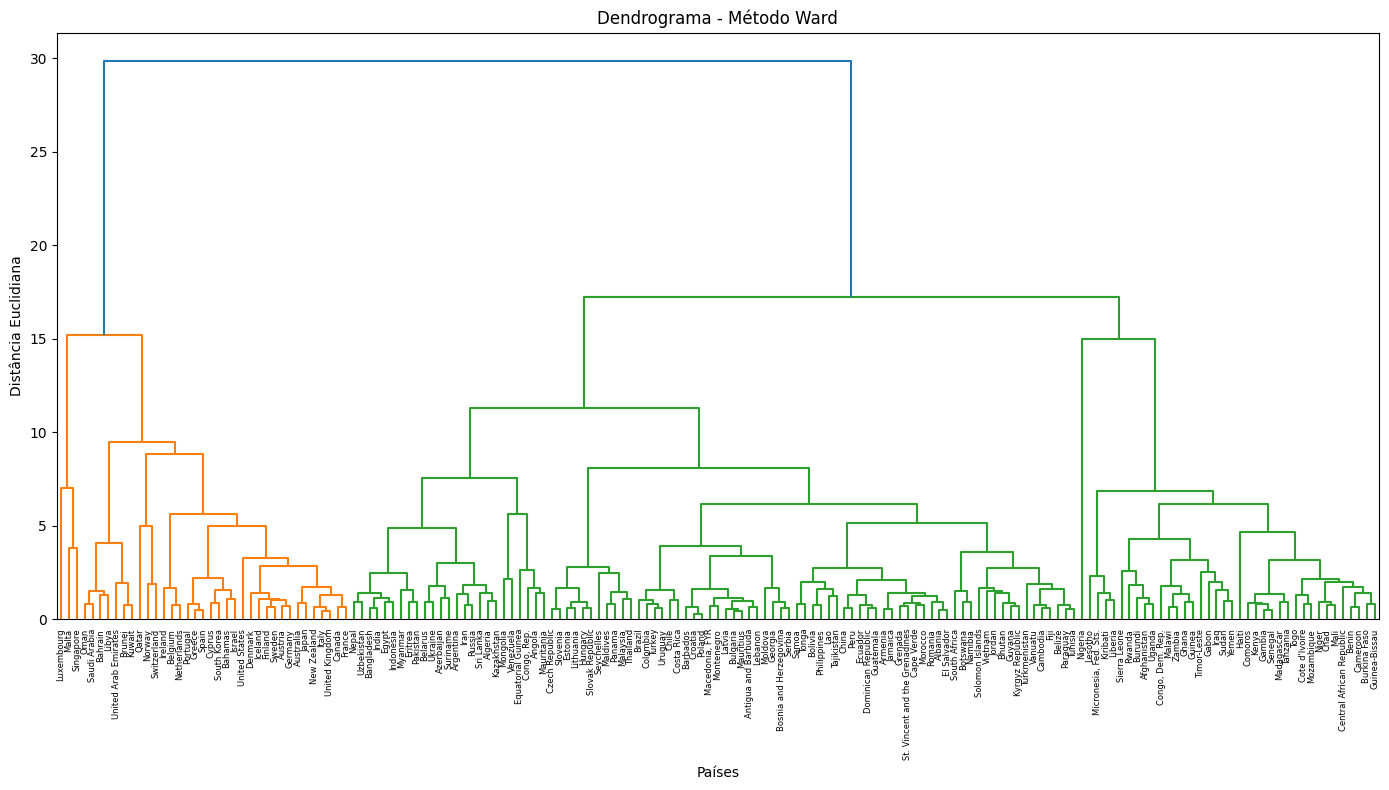

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


linked = linkage(training_data, method='ward')

plt.figure(figsize=(14, 8))
dendrogram(
    linked,
    labels=df['country'].values,  
    leaf_rotation=90,             
    leaf_font_size=6             
)
plt.title('Dendrograma - Método Ward')
plt.xlabel('Países')
plt.ylabel('Distância Euclidiana')
plt.tight_layout()
plt.show()


A fim de melhor analisar e ler os nomes dos países, vamos visualizar o dendograma na horizontal, e destacar cada agrupamento feito (ward com uma cor diferente):

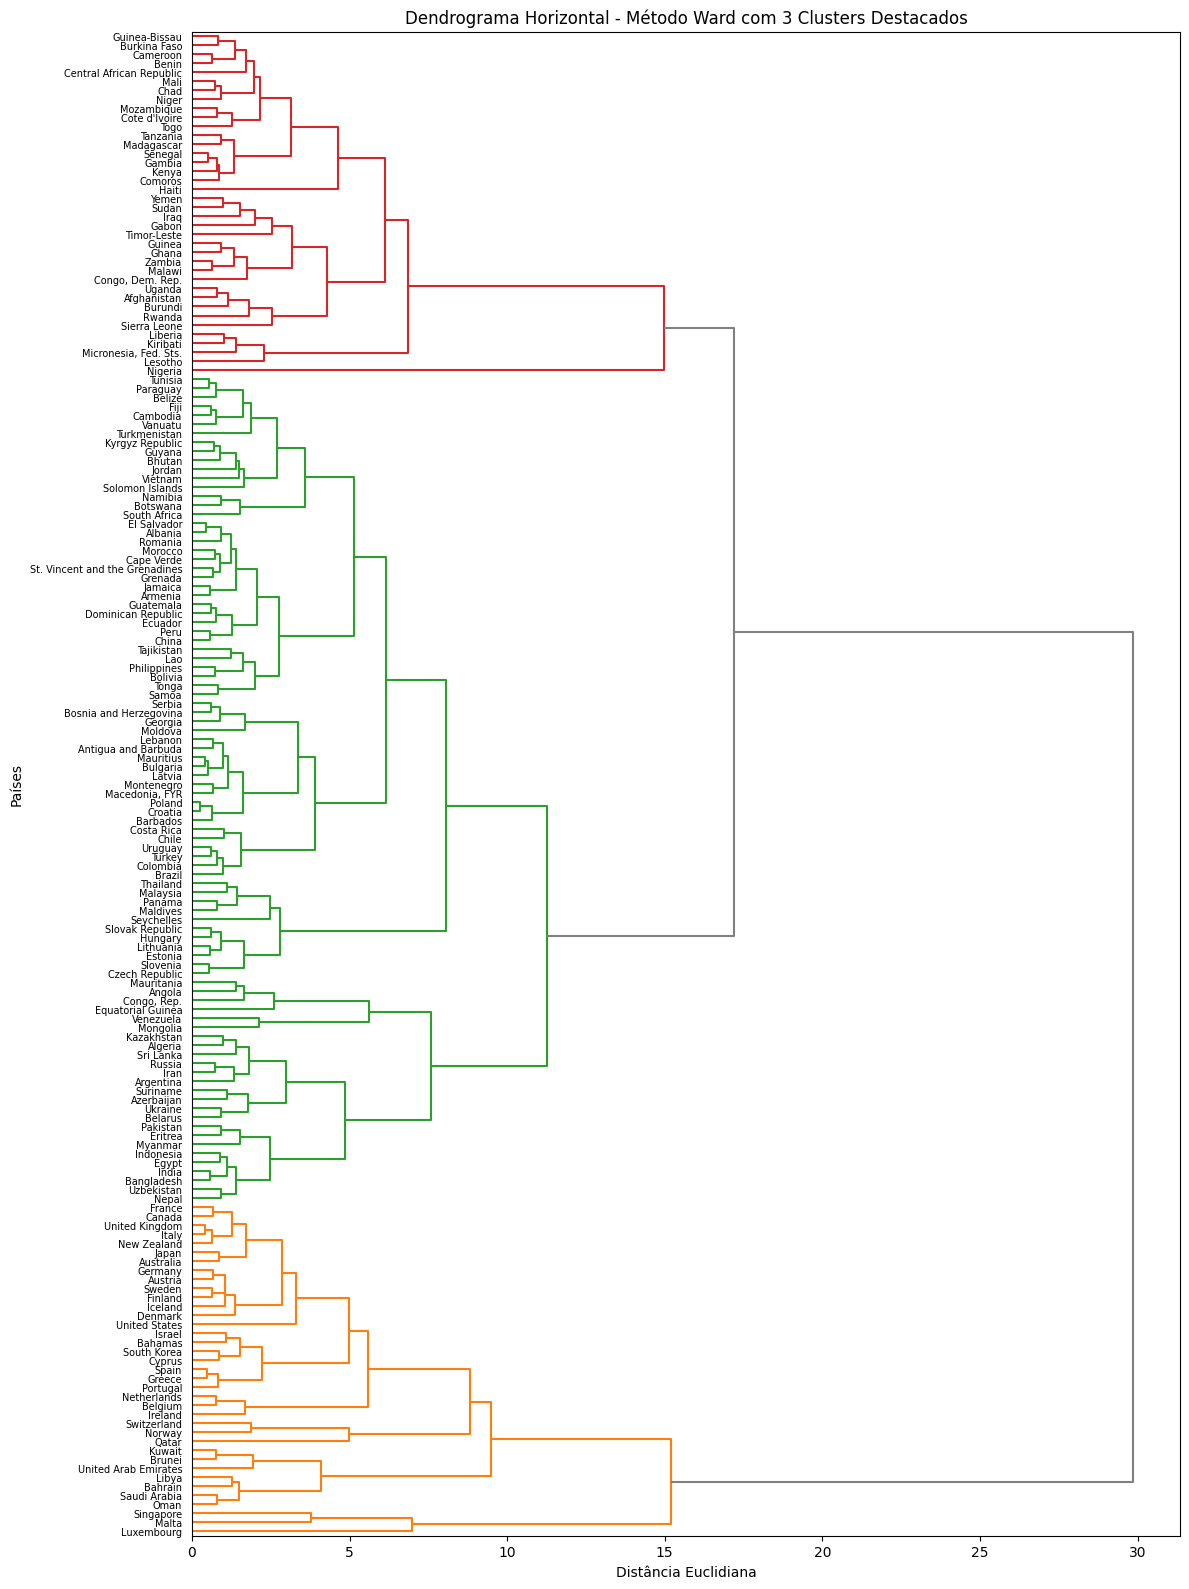

In [67]:
n_clusters = 3

max_d = linked[-(n_clusters - 1), 2]  # distância que dá origem à divisão em 3 clusters

plt.figure(figsize=(12, 16))
dendrogram(
    linked,
    labels=df['country'].values,  
    leaf_font_size=7,
    orientation='right',
    color_threshold=max_d,        # define o limite de corte das cores
    above_threshold_color='gray'  
)

plt.title('Dendrograma Horizontal - Método Ward com 3 Clusters Destacados')
plt.xlabel('Distância Euclidiana')
plt.ylabel('Países')
plt.tight_layout()
plt.show()

Pelo dendograma, é possível visualizar e analisar grupos de países em níveis de tamanhos variados, sejam eles mais genéricos ou mais especializados. Podemos querer por exemplo agrupar em 20 grupos, ou em 3, e o dendograma permite a visualização de todas essas possíveis separações. Assim, pelo dendograma é possível verificar por exemplo que o Brasil, em grupos menores, tem dados muito semelhantes aos de países como Uruguai, Turquia e Colômbia. De forma mais genérica, por sua vez, se considerados apenas os 3 clusters inicialmente solicitados, é possível verificar que o Brasil está no mesmo grupo de países como: Egito, Indonésia, Argentina e Suriname. No plot feito acima, o foco está na divisão em 3 clusters, de modo que cada um deles está com as linhas de uma cor (vermelho, verde ou laranja).

É possível perceber ainda que a separação em clusters com a clusterização hierárquica utilizando o método ward demonstrou resultados parecidos com o obtido na clusterização com K-Means: um grupo de países (cor laranja) demonstra ser o grupo de países desenvolvidos, com melhores índices; outro grupo de países (cor verde) demonstra ser o grupo de países em desenvolvimento, com índices intermediários; e o grupo de países de cor vermelha demonstra ser o grupo de países mais pobres, com índices piores.

Por fim, da mesma forma que havíamos feito com o K-Means, vamos encontrar agora os países mais representativos (medoides) dos clusters gerados pela clusterização hierárquica:

In [68]:
representative_countries_ward = []


for cluster in sorted(df_scaled['ward'].unique()):

    cluster_data = df_scaled[df_scaled['ward'] == cluster]
    cluster_points = cluster_data[training_cols].values  
    
    dist_matrix = cdist(cluster_points, cluster_points, metric='euclidean')
    sum_distances = dist_matrix.sum(axis=1)
    
    medoid_index = np.argmin(sum_distances)
    medoid_country = cluster_data.iloc[medoid_index]['country']
    
    representative_countries_ward.append((cluster, medoid_country))

print("======== Países representativos de cada cluster (Hierárquico - Ward) ========")
for cluster, country in representative_countries_ward:
    print(f"Cluster {cluster}: {country}")

======== Países representativos de cada cluster (Hierárquico - Ward) ========
Cluster 0: Iceland
Cluster 1: Tanzania
Cluster 2: Paraguay


/tmp/ipykernel_6284/9183850.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_6284/9183850.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_6284/9183850.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')


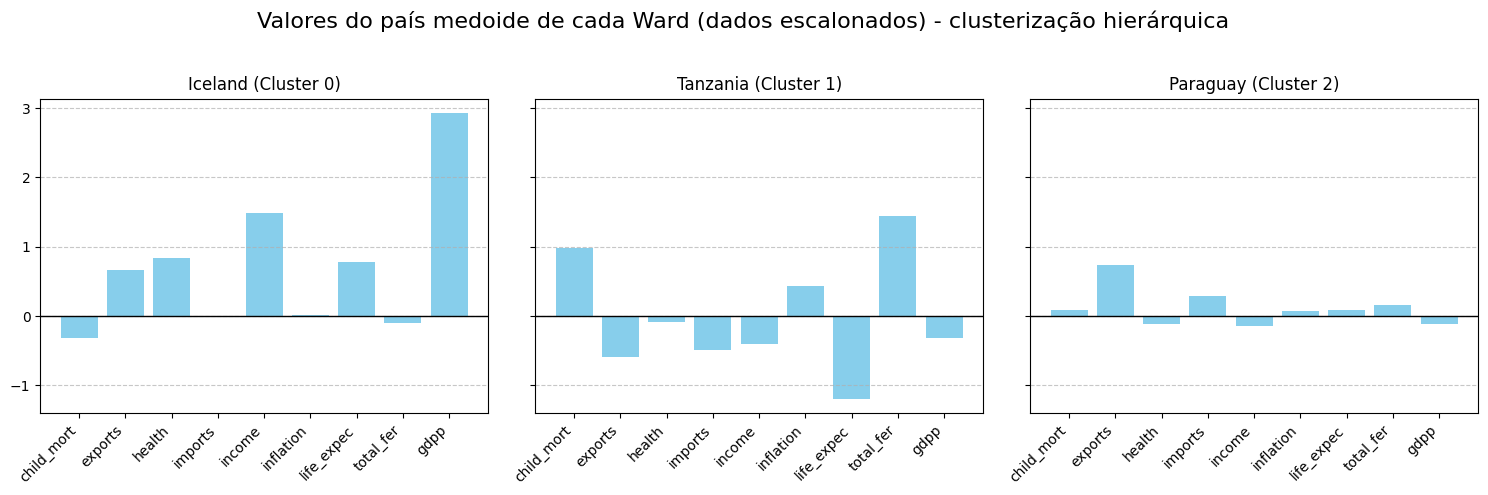

In [69]:

n_clusters = df_scaled['ward'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['ward'].unique())):
    
    country_name = [c for cl, c in representative_countries_ward if cl == cluster][0]
    country_data = df_scaled[df_scaled['ward'] == cluster]
    country_data = country_data[country_data['country'] == country_name]
    
    values = country_data[training_cols].iloc[0]

    axes[i].bar(training_cols, values, color='skyblue')
    axes[i].set_title(f"{country_name} (Cluster {cluster})")
    axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Valores do país medoide de cada Ward (dados escalonados) - clusterização hierárquica", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Por fim, assim como fizemos no K-Médias, vamos plotar os gráficos de pairplot e boxplot para realizar mais análises.
Vamos utilizar as mesmas cores de clusters que foram utilizadas no K-Médias, mas desta vez veremos que cada cor corresponderá a um grupo diferente:


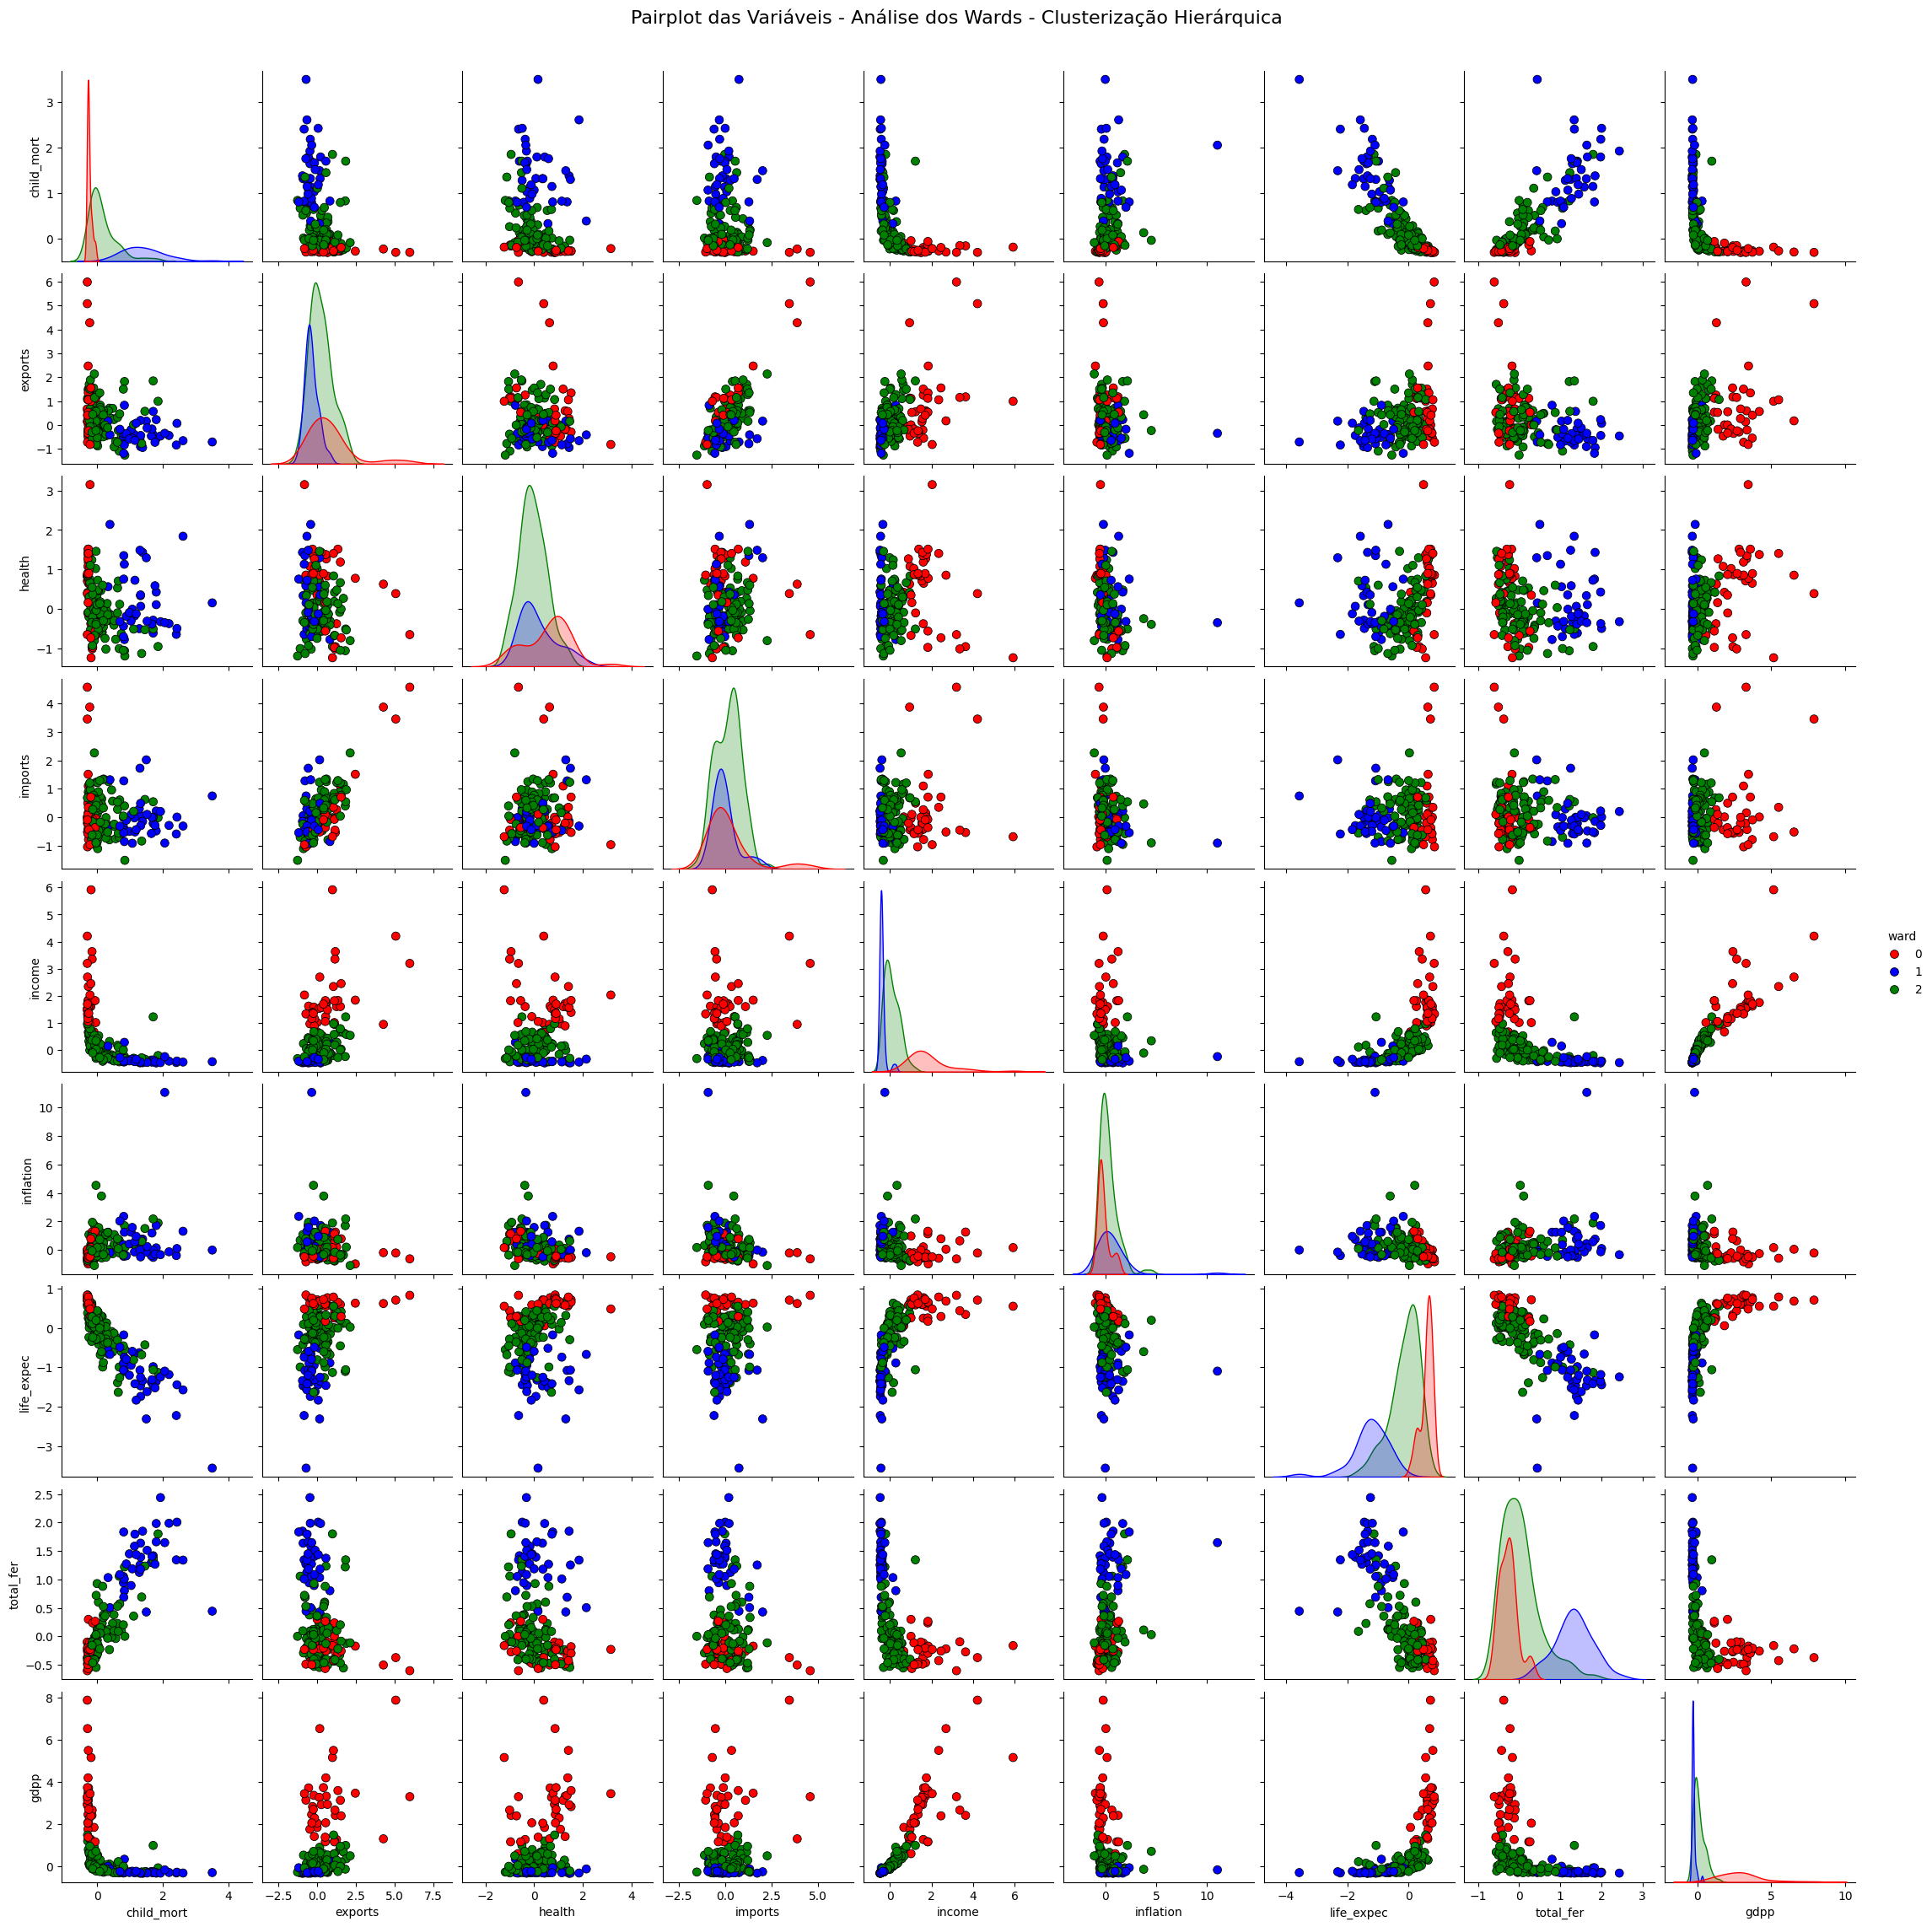

In [72]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green'
}

sns.pairplot(
    data=df_scaled,
    vars=training_cols,
    hue='ward',
    palette=cluster_colors,
    diag_kind='kde',
    plot_kws={'alpha': 1, 's': 50, 'edgecolor': 'k'}  
)

plt.suptitle('Pairplot das Variáveis - Análise dos Wards - Clusterização Hierárquica', y=1.02, fontsize=16)
plt.show()


/tmp/ipykernel_6284/944131101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scaled, x='ward', y=column, ax=ax[i], palette=cluster_colors)
/tmp/ipykernel_6284/944131101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scaled, x='ward', y=column, ax=ax[i], palette=cluster_colors)
/tmp/ipykernel_6284/944131101.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_scaled, x='ward', y=column, ax=ax[i], palette=cluster_colors)
/tmp/ipykernel_6284/944131101.py:11: FutureWarning: 

Passing `palette` without assignin

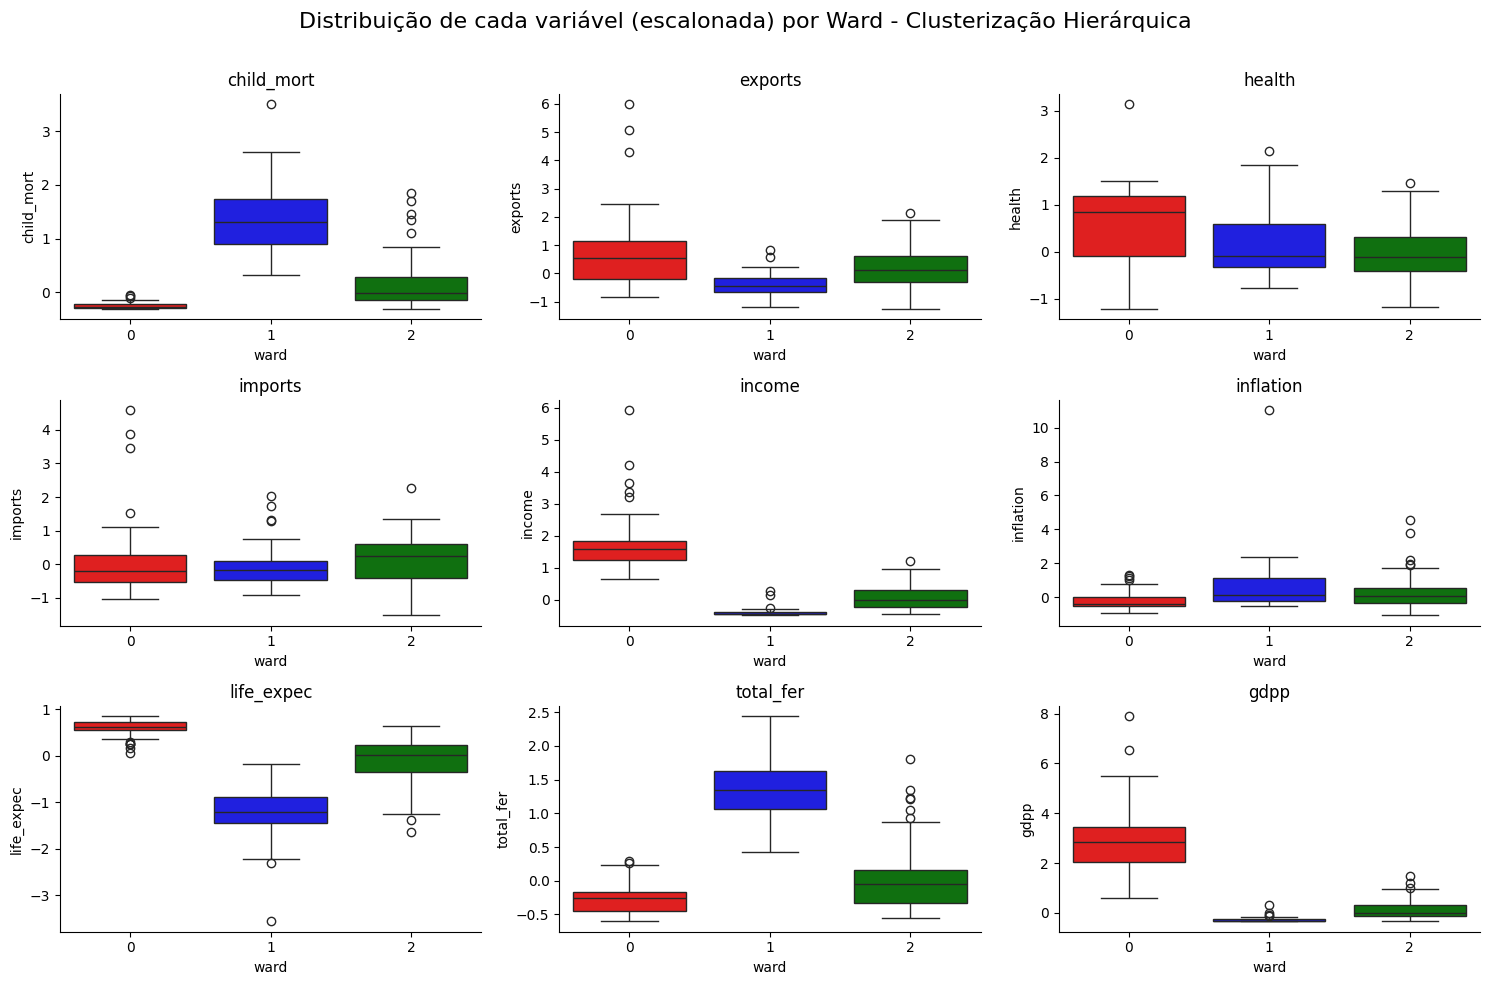

In [75]:
cluster_colors = {
    '0': 'red',
    '1': 'blue',
    '2': 'green'
}

f, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten() 

for i, column in enumerate(training_cols):
    sns.boxplot(data=df_scaled, x='ward', y=column, ax=ax[i], palette=cluster_colors)
    ax[i].set_title(column)

for j in range(len(training_cols), len(ax)):
    ax[j].set_visible(False)

f.suptitle('Distribuição de cada variável (escalonada) por Ward - Clusterização Hierárquica', fontsize=16)

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

Por fim, vamos calcular ainda o centroide encontrado para cada cluster na clusterização hierárquica:

In [76]:
ward_means_scaled = df_scaled.groupby('ward').mean(numeric_only=True)
ward_means_scaled.drop(columns=['cluster_kmeans'], inplace=True)
ward_means_scaled

child_mort   exports    health   imports    income  inflation  \
ward                                                                  
0      -0.245878  0.813165  0.558093  0.196904  1.857881  -0.165445   
1       1.415286 -0.376330  0.191290 -0.022398 -0.380827   0.666652   
2       0.153769  0.230916 -0.058956  0.158329  0.080808   0.276830   

      life_expec  total_fer      gdpp  
ward                                   
0       0.584019  -0.265085  2.924273  
1      -1.237986   1.328790 -0.268785  
2      -0.125142   0.026118  0.120004

/tmp/ipykernel_6284/2586321864.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(ward_means_scaled.columns, rotation=45, ha='right')
/tmp/ipykernel_6284/2586321864.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(ward_means_scaled.columns, rotation=45, ha='right')
/tmp/ipykernel_6284/2586321864.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(ward_means_scaled.columns, rotation=45, ha='right')


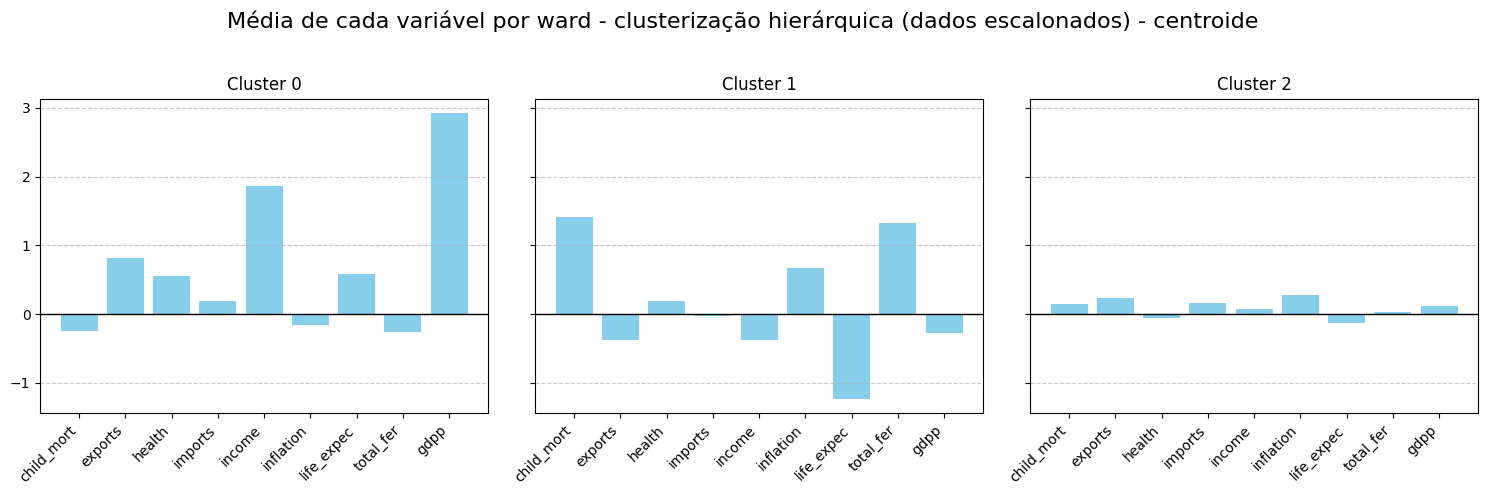

In [77]:
n_clusters = df_scaled['ward'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['ward'].unique())):
    axes[i].bar(ward_means_scaled.columns, ward_means_scaled.loc[cluster], color='skyblue')
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xticklabels(ward_means_scaled.columns, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Média de cada variável por ward - clusterização hierárquica (dados escalonados) - centroide", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Foi possível então observar que a separação hierárquica, de forma bem semelhante ao K-Means, fez essencialment a separação entre países mais desenvolvidos, em desenvolvimento (intermediários) ou subdesenvolvidos (mais pobres). Todavia, no próximo tópico serão mais detalhadas as principais semelhanças e diferenças entre os resultados obtidos.

#### 3.4 - Comparação K-Means x Clusterização Hierárquica

Comparando os resultados obtidos, é possível perceber que em ambas as clusterizações realizadas, as características mais marcantes de cada grupo foram muito semelhantes. 

Se compararmos os pairplots, as distribuições de variáveis de cada cluster e as medoides e centroides de cada cluster, pode-se perceber **grandes semelhanças entre**:
- cluster 0 do KMeans e cluster 2 da clusterização hierárquica (ambos compreendem países intermediários, com índices médios de mortalidade infantil, expectativa de vida, rendimentos, PIB per capita, inflação, exportações, entre outros.)
- cluster 1 do KMeans e cluster 1 da clusterização hierárquica (ambos compreendem países subdesenvolvidos mais pobres, com índices piores, por exemplo: mortalidade infantil mais alta, menor expectativa de vida, baixos rendimentos, baixo PIB per capita, alta inflação, poucas exportações, entre outros.)
- cluster 2 do KMeans e cluster 0 da clusterização hierárquica (ambos compreendem países desenvolvidos mais ricos, com melhores índices, como: baixa mortalidade infantil, maior expectativa de vida, altos rendimentos, alto PIB per capita, baixa inflação, grande quantidade de exportações e saúde elevada)

**Diferenças importantes encontradas:**
- a numeração dos clusters determinada para cada agrupamento foi diferente, conforme já comentado acima. No entanto, a essência utilizada para realizar as separações foi bem semelhante.
- **na clusterização hierárquica, a saúde do grupo de "países com índices intermediários" está com índice médio pior do que os países mais pobres (subdesenvolvidos)**. Isso pode ser observado nos gráficos de boxplot mas também nos gráficos de centroide e dos medoides: o país medoide (Paraguai) do cluster 2 da clusterização hierárquica (países intermediários) tem a saúde pior do que o país medoide (Tanzânia) do cluster 1 (países mais pobres). Isso mostra que a clusterização aqui não captou a essência da separação desejada tão bem quanto o KMeans, tendo usado a separação da saúde de forma diferente do esperado.
- com a clusterização hierárquica, é possível explorar a quantidade de clusters que desejarmos, bem como a estrutura dos dados de maneira fácil, e isso se torna especialmente poderoso por meio do dendograma.


### Parte 4

#### 4.1 Etapas do K-Médias até sua convergência 

O algoritmo K-Médias funciona da seguinte forma:

a. Seja x a quantidade desejada de clusters. Então x pontos são escolhidos aleatoriamente entre os dados. Eles são definidos como os "centroides iniciais", e cada um deles representa um cluster.

b. Para cada um dos demais pontos, é calculada a sua distância (euclidiana) em relação a cada um dos x pontos "centroides", e a ele é atribuído o cluster do centroide em relação ao qual ele teve a menor distância.

c. Com os clusters recém definidos, é **redefinido** o centroide de cada cluster, que será calculado pela média dos pontos de cada cluster. Assim, os x pontos centroides são recalculados.

d. As etapas "b" e "c" são repetidas várias vezes, o que fará com que os centroides dos clusters convirjam para pontos específicos. Quando os pontos de cada cluster não mudarem mais, significa que terá finalizado a convergência.

#### 4.2 Etapas do K-Médias utilizando como centroide o ponto real mais próximo do baricentro

Nessa nova estrutura, o algoritmo será bem parecido com o anterior, e a diferença será essencialmente na etapa "c", de definição dos centroides:

a. Seja x a quantidade desejada de clusters. Então x pontos são escolhidos aleatoriamente entre os dados. Eles são definidos como os "centroides iniciais", e cada um deles representa um cluster.

b. Para cada um dos demais pontos, é calculada a sua distância (euclidiana) em relação a cada um dos pontos "centroides", e a ele é atribuído o cluster do centroide em relação ao qual ele teve a menor distância.

c. Com os clusters recém definidos, é calculado novamente o centroide, que será dessa vez o ponto real mais próximo do baricentro (ponto médio) de cada cluster.

d. As etapas "b" e "c" são repetidas várias vezes, o que fará com que os centroides dos clusters convirjam para pontos específicos. Quando os pontos de cada cluster não mudarem mais, significa que terá finalizado a convergência.

#### 4.3 Sensibilidade do algoritmo de K-Médias a outliers

No K-Médias, cujo algoritmo está descrito no item 4.1 acima, sempre que o centroide de cada cluster é recalculado, esse cálculo é baseado na média das variáveis dos pontos do cluster (o baricentro). Sabe-se que a média é uma medida sensível a outliers, justamente porque, se um valor destoar muito dos demais, essa medida puxará todos os demais no cálculo da média.

Como exemplo, podemos pensar no seguinte caso: em um determinado cluster, posso ter os seguintes pontos: (10,3), (11,4), (8,5), (9,4), (11,5), (10, 6), (50,4). Supondo que o primeiro eixo seja referente a uma determinada coluna A (variável), os pontos então terão os seguintes valores para A: 10, 11, 8, 9, 11, 10, e 50. Podemos perceber, com esses valores, que o padrão de A nesse cluster é um valor entre 8 e 11. Porém, o valor de 50 (outlier) no meio desses dados puxa sua média muito para cima: nesse caso, a média seria:
$$
Média = \frac{10 + 11 + 8 + 9 + 11 + 10 + 50}{7} = 15{,}57
$$

Portanto, o outlier medido nessa coluna puxou o centroide desse cluster para cima (o valor dessa coluna A no centroide vai ser de 15,57, apesar de o valor padrão de A no cluster ser mais baixo).

